# **SSC0957 - Prática em Ciência de Dados II**
---

### **Alunos:**
> #### Arthur Santorum Lorenzetto - 12559465
> #### André Guarnier De Mitri    - 11395579
> #### Rui Emanuel Lima Vieira    - 11819182

### **Professor:** Alexandre Claudio Botazzo Delbem
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats

In [2]:
df = pd.read_parquet('Dados/obitos_raca_cor.parquet', engine='pyarrow')
df.head(2)

,codigo_ibge,nome_munic,nome_drs,obito,raca_cor,idade,cs_sexo,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,pneumopatia,puerpera,sindrome_de_down
0,3500303.0,Aguaí,São João da Boa Vista,False,None,41.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
1,3555000.0,Tupã,Marília,False,PARDA,31.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN


In [3]:
condicao_sem_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)

# Filtrando o DataFrame
df_sem_comorbidade = df[condicao_sem_comorbidade]

# Exibindo o resultado
df_sem_comorbidade.head(2)

,codigo_ibge,nome_munic,nome_drs,obito,raca_cor,idade,cs_sexo,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,pneumopatia,puerpera,sindrome_de_down
26,3550308.0,São Paulo,Município de São Paulo,False,PARDA,44.0,feminino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,3518800.0,Guarulhos,Grande SP Leste,False,BRANCA,27.0,feminino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
condicao_comorbidade = (
    ((df['asma'].isna() == False) | (df['asma'] != None)) |
    ((df['cardiopatia'].isna() == False) | (df['cardiopatia'] != None)) |
    ((df['diabetes'].isna() == False) | (df['diabetes'] != None)) |
    ((df['doenca_hematologica'].isna() == False) | (df['doenca_hematologica'] != None)) |
    ((df['doenca_hepatica'].isna() == False) | (df['doenca_hepatica'] != None)) |
    ((df['doenca_neurologica'].isna() == False) | (df['doenca_neurologica'] != None)) |
    ((df['doenca_renal'].isna() == False) | (df['doenca_renal'] != None)) |
    ((df['imunodepressao'].isna() == False) | (df['imunodepressao'] != None)) |
    ((df['obesidade'].isna() == False) | (df['obesidade'] != None)) |
    ((df['pneumopatia'].isna() == False) | (df['pneumopatia'] != None)) |
    ((df['puerpera'].isna() == False) | (df['puerpera'] != None)) |
    ((df['sindrome_de_down'].isna() == False) | (df['sindrome_de_down'] != None))
)

# Filtrando o DataFrame
df_com_comorbidade = df[condicao_comorbidade]

# Exibindo o resultado
df_com_comorbidade

,codigo_ibge,nome_munic,nome_drs,obito,raca_cor,idade,cs_sexo,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,pneumopatia,puerpera,sindrome_de_down
0,3500303.0,Aguaí,São João da Boa Vista,False,None,41.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
1,3555000.0,Tupã,Marília,False,PARDA,31.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
2,3534401.0,Osasco,Grande SP Oeste,False,PARDA,32.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
3,3548708.0,São Bernardo do Campo,Grande SP Sudeste,False,PARDA,41.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
4,3557006.0,Votorantim,Sorocaba,False,BRANCA,44.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856220,3504107.0,Atibaia,Campinas,False,BRANCA,65.0,feminino,NaN,1.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
2856221,3552205.0,Sorocaba,Sorocaba,False,BRANCA,37.0,masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2856222,3554102.0,Taubaté,Taubaté,False,BRANCA,68.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
2856223,3506003.0,Bauru,Bauru,False,None,62.0,masculino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN


sem comorbidade: 136278
com comorbidade: 2856225


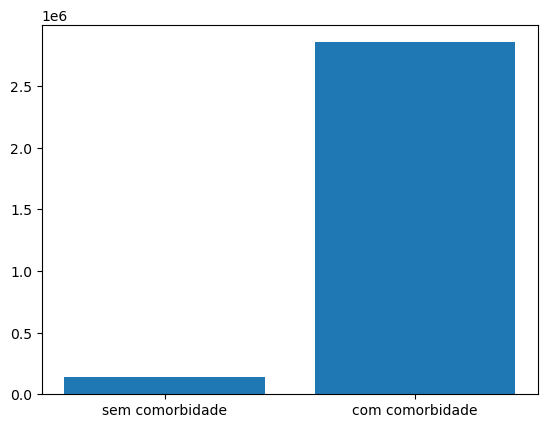

In [5]:
plt.bar(x=['sem comorbidade','com comorbidade'], height=[len(df_sem_comorbidade), len(df_com_comorbidade)])
print(f'sem comorbidade: {len(df_sem_comorbidade)}')
print(f'com comorbidade: {len(df_com_comorbidade)}')
plt.show()

In [6]:
# sample = np.random.choice(df_com_comorbidade.dropna().index, 136278)
# sample_df_com_comorbidade = df_com_comorbidade.loc[sample].reset_index(drop = True)
# plt.bar(x=['sem comorbidade','com comorbidade'], height=[len(df_sem_comorbidade), len(df_com_comorbidade)])
# print(f'sem comorbidade: {len(df_sem_comorbidade)}')
# print(f'com comorbidade: {len(sample_df_com_comorbidade)}')
# plt.show()

---
---

# Verificando Normalidade (Shapiro Wilk)

In [7]:
# Teste de Shapiro-Wilk
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality < 0.05:
        print("Rejeito H0 ---> Dados não possuem distribuição normal")
    else:
        print("Não Rejeito H0 ---> Dados possuem distribuição normal")

## Testando a Idade (Entre pessoas COM e SEM comorbidade)

H0: A distribuição seguem uma distribuição normal

H1: A distribuição NÃO seguem uma distribuição normal

In [8]:
check_normality(df_sem_comorbidade['idade'])
check_normality(df_com_comorbidade['idade'])

p value:1.0000
Não Rejeito H0 ---> Dados possuem distribuição normal
p value:1.0000
Não Rejeito H0 ---> Dados possuem distribuição normal


/home/andre/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


A idade de pessoas SEM comorbidade segue uma distribuição Normal

A idade de pessoas COM comorbidade segue uma distribuição Normal

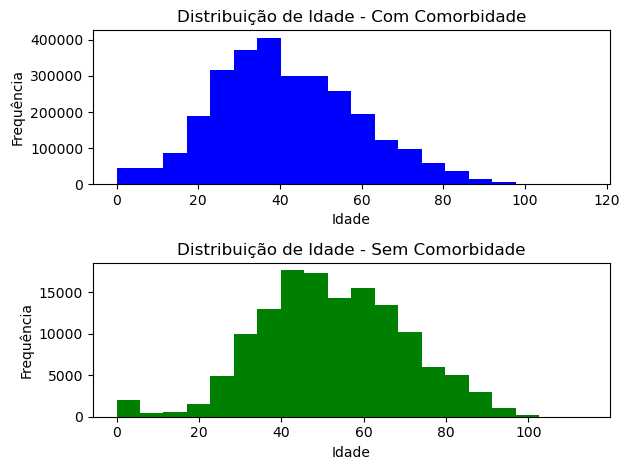

In [9]:
plt.subplot(2, 1, 1)  # 2 linhas, 1 coluna, plot 1
plt.hist(df_com_comorbidade['idade'], bins=20, color='blue')
plt.title('Distribuição de Idade - Com Comorbidade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Subplot para df_sem_comorbidade
plt.subplot(2, 1, 2)  # 2 linhas, 1 coluna, plot 2
plt.hist(df_sem_comorbidade['idade'], bins=20, color='green')
plt.title('Distribuição de Idade - Sem Comorbidade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Ajuste de layout para evitar sobreposição
plt.tight_layout()

# Exibição dos plots
plt.show()


---
---

# Teste para Variância (Levene’s test)

In [10]:
# Levene’s test
def check_variance_homogeneity(data1, data2):
    test_stat_var, p_value_var= stats.levene(data1.dropna(),data2.dropna())
    print("p value:%.4f" % p_value_var)
    if p_value_var < 0.05:
        print("Rejeita H0")
    else:
        print("Não rejeita H0")

Para as variâncias da idade das pessoas COM comorbidade ($\sigma_1$) e variância da idade das pessoas SEM comorbidade ($\sigma_2$)

H0: $\sigma_1 = \sigma_2$, A variância é igual para COM comorbidade e SEM comorbidade

H1: $\sigma_1 \neq \sigma_2$, A variância é diferente para COM comorbidadee SEM comorbidade

## Testando a idade

In [11]:
check_variance_homogeneity(df_sem_comorbidade['idade'], df_com_comorbidade['idade'])

p value:0.0000
Rejeita H0


A **variância da idade** de pessoas COM comorbidade é **DIFERENTE** das pessoas SEM comorbidade

---
---

# Teste para média (Mann–Whitney)

In [12]:
def test_media(data1, data2):
    ttest,p_value = stats.mannwhitneyu(data1.dropna(), data1.dropna(), alternative="two-sided")
    #print(data1.dropna().mean(), data2.dropna().mean())
    print("p value:%.8f" % p_value)
    if p_value < 0.05:
        print("Rejeita H0")
    else:
        print("Não rejeita H0")

## Testando a idade

Para as média da idade das pessoas COM comorbidade ($\mu_1$) e média da idade das pessoas SEM comorbidade ($\mu_2$)

H0: $\mu_1 = \mu_2$, A média é igual para COM e SEM comorbidade

H1: $\mu_1 \neq \mu_2$, A média é diferente para COM e SEM comorbidade

In [13]:
test_media(df_sem_comorbidade['idade'], df_com_comorbidade['idade'])

p value:1.00000000
Não rejeita H0


A **idade** de pessoas SEM comorbidade e COM comorbidade **tem a mesma média** para 95% de significancia

---
---

# Teste para dependencia de caracteristicas (Qui Quadrado)


H0: A variavel (A) é INDEPENDENTE da variável (B)

H1: A variavel (A) é DEPENDENTE da variável (B)

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency

# Comorbidades
df_subset = df_com_comorbidade[['obito', 'asma', 'cardiopatia', 'diabetes', 'doenca_hematologica',
                                'doenca_hepatica', 'doenca_neurologica', 'doenca_renal',
                                'imunodepressao', 'obesidade', 'pneumopatia', 'puerpera', 'sindrome_de_down']]

df_subset = df_subset.fillna(0) # Substitua os valores NaN por 0
results = []

# Para cada comorbidade
for comorbidade in df_subset.columns[1:]:
    # Tabela contigencia
    contingency_table = pd.crosstab(df_subset['obito'], df_subset[comorbidade])

    # Test qui-quadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Resultado
    results.append({'Comorbidade': comorbidade, 'Chi2': chi2, 'P-value': p})

# Resultado
results_df = pd.DataFrame(results).sort_values(by='Chi2', ascending=False).reset_index(drop=True)
results_df

,Comorbidade,Chi2,P-value
0,doenca_renal,737352.849560,0.0
1,imunodepressao,731057.913355,0.0
2,diabetes,594872.328419,0.0
3,cardiopatia,521211.073742,0.0
4,doenca_neurologica,480225.044594,0.0
5,pneumopatia,468470.396507,0.0
6,obesidade,463607.034943,0.0
7,doenca_hepatica,449854.016269,0.0
8,doenca_hematologica,448379.264459,0.0
9,asma,447083.779511,0.0


Os resultados indicam que, para cada uma das comorbidades listadas, o teste qui-quadrado de independência gerou um valor muito alto para a estatística qui-quadrado um valor-p extremamente baixo (próximo a zero). Isso sugere fortemente a rejeição da hipótese nula de independência entre a presença da comorbidade e a variável de óbito.

Em termos práticos, isso significa que há uma associação significativa entre cada uma das comorbidades (asma, cardiopatia, diabetes, doença hematológica, doença hepática, doença neurológica, doença renal, imunodepressão, obesidade, pneumopatia, puerpera, síndrome de Down) e a ocorrência de óbito. O valor-p próximo de zero sugere que a probabilidade de os resultados observados ocorrerem por acaso, assumindo independência, é muito baixa.


**Importante:** O resultado está ordenado por maior estatísitca Qui-Quadrado, indicando que a característica possuí maior influência no óbito

# Teste T

## Pessoas com comorbidade, testando COM óbito e SEM óbito

A média da idade das pessoas que TIVERAM obito ($\mu_1$) e a média das pessoas que NÃO tiveram óbito ($\mu_2$)

H0: $\mu_1 = \mu_2$, A média é igual para COM e SEM óbito

H1: $\mu_1 \neq \mu_2$, A média é diferente para COM e SEM óbito

In [15]:
from scipy.stats import ttest_ind

# Subconjunto de dados relevantes
df_subset_idade = df_com_comorbidade[['obito', 'idade']].dropna()

# Divida os dados em dois grupos: óbito e não óbito
grupo_obito = df_subset_idade[df_subset_idade['obito'] == True]['idade']
grupo_nao_obito = df_subset_idade[df_subset_idade['obito'] == False]['idade']

# Realize o teste t de Student
t_statistic, p_value = ttest_ind(grupo_obito, grupo_nao_obito)

# Exiba os resultados
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interprete os resultados
alpha = 0.05
if p_value < alpha:
    print("A hipótese nula de que não há diferença significativa na idade entre os grupos é rejeitada.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. A idade pode não ser significativamente diferente entre os grupos.")


T-Statistic: 483.0209275172298
P-Value: 0.0
A hipótese nula de que não há diferença significativa na idade entre os grupos é rejeitada.


Como resultado, temos que a **idade têm influência no  váriavel óbito** para pessoas com comorbidade

## Pessoas sem comorbidade, testando COM óbito e SEM óbito

A média da idade das pessoas que TIVERAM obito ($\mu_1$) e a média das pessoas que NÃO tiveram óbito ($\mu_2$)

H0: $\mu_1 = \mu_2$, A média é igual para COM e SEM óbito

H1: $\mu_1 \neq \mu_2$, A média é diferente para COM e SEM óbito

In [16]:
from scipy.stats import ttest_ind

# Subconjunto de dados relevantes
df_subset_idade = df_sem_comorbidade[['obito', 'idade']].dropna()

# Divida os dados em dois grupos: óbito e não óbito
grupo_obito = df_subset_idade[df_subset_idade['obito'] == True]['idade']
grupo_nao_obito = df_subset_idade[df_subset_idade['obito'] == False]['idade']

# Realize o teste t de Student
t_statistic, p_value = ttest_ind(grupo_obito, grupo_nao_obito)

# Exiba os resultados
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interprete os resultados
alpha = 0.05
if p_value < alpha:
    print("A hipótese nula de que não há diferença significativa na idade entre os grupos é rejeitada.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. A idade pode não ser significativamente diferente entre os grupos.")


T-Statistic: 134.70191407297727
P-Value: 0.0
A hipótese nula de que não há diferença significativa na idade entre os grupos é rejeitada.


Como resultado, temos que a **idade têm influência no  váriavel óbito** para pessoas sem comorbidade.

## Amostra com todos dados, testando COM óbito e SEM óbito

A média da idade das pessoas que TIVERAM obito ($\mu_1$) e a média das pessoas que NÃO tiveram óbito ($\mu_2$)

H0: $\mu_1 = \mu_2$, A média é igual para COM e SEM óbito

H1: $\mu_1 \neq \mu_2$, A média é diferente para COM e SEM óbito

In [17]:
from scipy.stats import ttest_ind

# Subconjunto de dados relevantes
df_subset_idade = df[['obito', 'idade']].dropna()

# Divida os dados em dois grupos: óbito e não óbito
grupo_obito = df_subset_idade[df_subset_idade['obito'] == True]['idade']
grupo_nao_obito = df_subset_idade[df_subset_idade['obito'] == False]['idade']

# Realize o teste t de Student
t_statistic, p_value = ttest_ind(grupo_obito, grupo_nao_obito)

# Exiba os resultados
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interprete os resultados
alpha = 0.05
if p_value < alpha:
    print("A hipótese nula de que não há diferença significativa na idade entre os grupos é rejeitada.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. A idade pode não ser significativamente diferente entre os grupos.")

T-Statistic: 483.0209275172298
P-Value: 0.0
A hipótese nula de que não há diferença significativa na idade entre os grupos é rejeitada.


Como resultado, temos que a **idade têm influência no  váriavel óbito**.

# Função para gerar piramide etária e fazer o teste t

In [18]:
import time

def gera_piramide_etaria(data, comorbidade):
    # Contagem de idades por faixa etária e gênero de PARTE DOS DADOS
    contagem_idade_homens = (data.loc[data['cs_sexo'] == 'masculino', 'idade'] // 5).value_counts().sort_index(ascending=False)
    contagem_idade_mulheres = (data.loc[data['cs_sexo'] == 'feminino', 'idade'] // 5).value_counts().sort_index(ascending=False)

    # Valores Máximos
    max_len = max(len(contagem_idade_homens), len(contagem_idade_mulheres))
    contagem_idade_homens = contagem_idade_homens.reindex(range(max_len), fill_value=0)
    contagem_idade_mulheres = contagem_idade_mulheres.reindex(range(max_len), fill_value=0)

    # Calcular porcentagem em relação à população total de homens e mulheres
    total_pop = len(df)

    percentagem_idade_homens = (contagem_idade_homens / total_pop) * 100
    percentagem_idade_mulheres = (contagem_idade_mulheres / total_pop) * 100

    # Criar faixas etárias
    faixas_etarias = np.flip([str(i*5) + '-' + str((i+1)*5-1) for i in range(max_len)])

    # Plotar a pirâmide etária
    fig, ax = plt.subplots()

    # Homens à esquerda
    ax.barh(faixas_etarias, percentagem_idade_homens, color='blue', label='Homens')

    # Mulheres à direita
    ax.barh(faixas_etarias, [-x for x in percentagem_idade_mulheres], color='orange', label='Mulheres')

    # Ajustes estéticos
    ax.set_xlabel('Porcentagem da População (%)')
    ax.set_ylabel('Faixa Etária')
    ax.set_title(f"{comorbidade}")
    ax.legend()
    max_value = max(percentagem_idade_homens.max(), percentagem_idade_mulheres.max())
    ax.set_xlim(-max_value, max_value)

    # Inverter eixo y para ter a faixa etária mais jovem na parte inferior
    ax.invert_yaxis()

    # Mostrar quanto é 100% da população total
    total_com_condicao = contagem_idade_mulheres.sum() + contagem_idade_homens.sum()
    print(f"100% da população: {total_pop} --- Pessoas com essa condição {total_com_condicao} ({total_com_condicao/total_pop:.6f}%)")

    # Salvando imagem
    plt.savefig(f'imagens/{comorbidade}.png')

    # Mostrando img
    plt.show()

In [19]:
from scipy.stats import ttest_ind

def compara_genero(data):
    # Lista para armazenar os resultados dos testes para cada faixa etária
    resultados = []

    # Loop pelas faixas etárias de 5 em 5 anos
    for i in range(0, 100, 5):  # Ajuste o intervalo conforme sua faixa de idades
        # Subconjunto de dados relevantes para a faixa etária atual
        subset = data[(data['idade'] >= i) & (data['idade'] < i + 5)]

        # Divida os dados em dois grupos: masculino e feminino
        grupo1 = subset[subset['cs_sexo'] == 'masculino']['idade']
        grupo2 = subset[subset['cs_sexo'] == 'feminino']['idade']

        # Realize o teste t de Student se houver dados suficientes
        if len(grupo1) > 1 and len(grupo2) > 1:
            t_statistic, p_value = ttest_ind(grupo1, grupo2)
            resultados.append({'Faixa Etária': f'{i}-{i+4}', 'T-Statistic': t_statistic, 'P-Value': p_value})
        else:
            resultados.append({'Faixa Etária': f'{i}-{i+4}', 'T-Statistic': None, 'P-Value': None})

    # Exiba os resultados
    for resultado in resultados:
        print(f"Faixa Etária: {resultado['Faixa Etária']}")
        if resultado['T-Statistic'] is not None and resultado['P-Value'] is not None:
            print(f"T-Statistic: {resultado['T-Statistic']}")
            print(f"P-Value: {resultado['P-Value']}")
            alpha = 0.05
            if resultado['P-Value'] < alpha:
                print("ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.")
            else:
                print("REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.")
        else:
            print("Não há dados suficientes para realizar o teste t de Student.")
        print("")

In [20]:
import matplotlib.pyplot as plt
import os

def show_multiplot(condition, images_folder='imagens', images_per_condition=5):
    # Get a list of all image files in the specified folder
    image_files = [f for f in os.listdir(images_folder) if f.endswith(".png")]

    # Filter image files based on the specified condition
    condition_files = [image_file for image_file in image_files if condition in image_file]

    # Check if there are images for the specified condition
    if not condition_files:
        print(f"No images found for the condition: {condition}")
        return

    # Set up the multiplot grid
    num_rows = 3
    num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 12))
    fig.suptitle(f"Pirames Etárias: {condition}", fontsize=16)

    # Iterate through images to display them in the multiplot
    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            if index < len(condition_files) and index < images_per_condition:
                image_file = condition_files[index]
                img_path = os.path.join(images_folder, image_file)
                img = plt.imread(img_path)
                axs[i, j].imshow(img)
                axs[i, j].axis('off')

                # Remove the file extension correctly
                file_name, _ = os.path.splitext(image_file)
                axs[i, j].set_title(file_name)
            else:
                # If index exceeds available images, remove the subplot
                axs[i, j].axis('off')

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Comorbidades - Todos os dados

100% da população: 2856225 --- Pessoas com essa condição 2844531 (0.995906%)


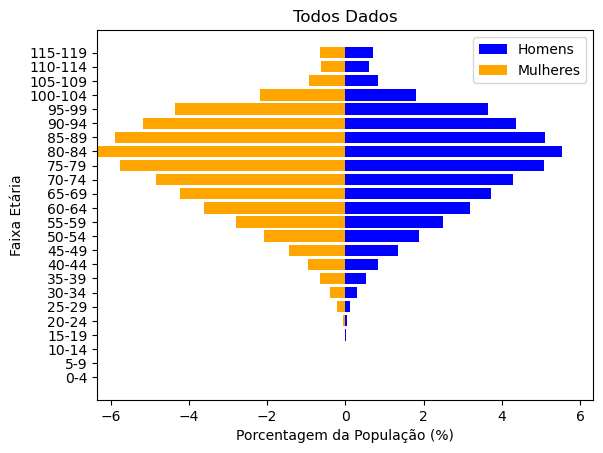

In [21]:
gera_piramide_etaria(df, 'Todos Dados')

# Asma

### Somente Asma

100% da população: 2856225 --- Pessoas com essa condição 1450 (0.000508%)


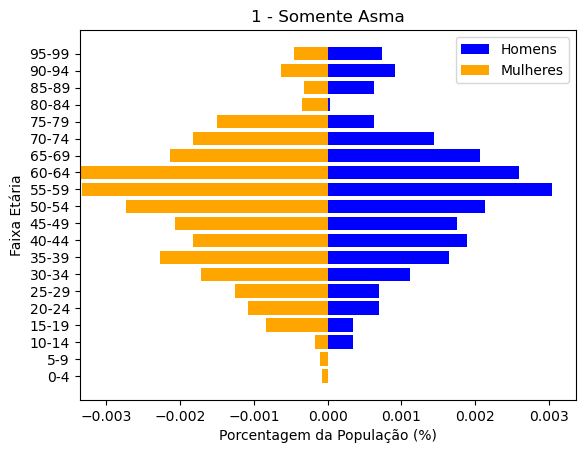

Faixa Etária: 0-4
T-Statistic: -0.993266221002741
P-Value: 0.3280320113057209
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: 0.9266261262504535
P-Value: 0.359415028676199
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: 0.4207180548497742
P-Value: 0.6775556442658748
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
T-Statistic: 1.068860663646214
P-Value: 0.2894861427171356
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.8731578539623983
P-Value: 0.06425660973238706
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: -2.4789997680634275
P-Value: 0

In [22]:
condicao_comorbidade = (
    ((df['asma'] >= 1)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], "1 - Somente Asma")
compara_genero(df[condicao_comorbidade])

### Asma e outras comorbidades

100% da população: 2856225 --- Pessoas com essa condição 132590 (0.046421%)


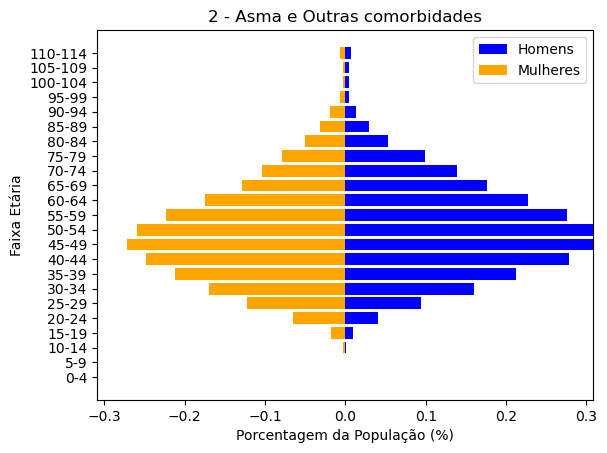

Faixa Etária: 0-4
T-Statistic: 0.029611790855963074
P-Value: 0.9763914672775899
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -0.08392459734529985
P-Value: 0.9331978820877463
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: 0.24577192588149974
P-Value: 0.8060932474355492
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -0.6890290441598916
P-Value: 0.4913393114691369
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 1.701623728435497
P-Value: 0.0891630635361286
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.9046951946317965
P-Value: 0.05698473784857162
REJEITA hipótese nula: pode haver diferença significativa 

In [23]:
condicao_comorbidade = (
    (df['asma'] >= 1)
)
gera_piramide_etaria(df[condicao_comorbidade], "2 - Asma e Outras comorbidades")
compara_genero(df[condicao_comorbidade])

### Asma Óbito

100% da população: 2856225 --- Pessoas com essa condição 134 (0.000047%)


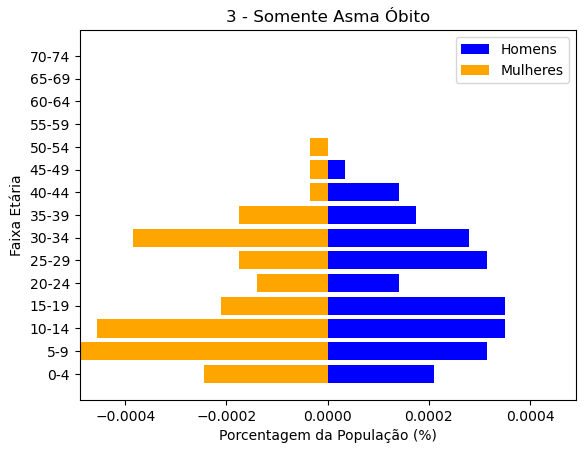

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 35-39
T-Statistic: 1.4288690166235192
P-Value: 0.19090161851319054
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
T-Statistic: -0.05056879262798414
P-Value: 0.9602585516812641
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 45-49
T-Statistic: 0.28647315633565773
P-Value: 0.7794016104668361
RE

In [24]:
condicao_comorbidade = (
    (df['obito'] == True) &
    ((df['asma'] >= 1)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], "3 - Somente Asma Óbito")
compara_genero(df[condicao_comorbidade])

### Asma Não óbito

100% da população: 2856225 --- Pessoas com essa condição 1282 (0.000449%)


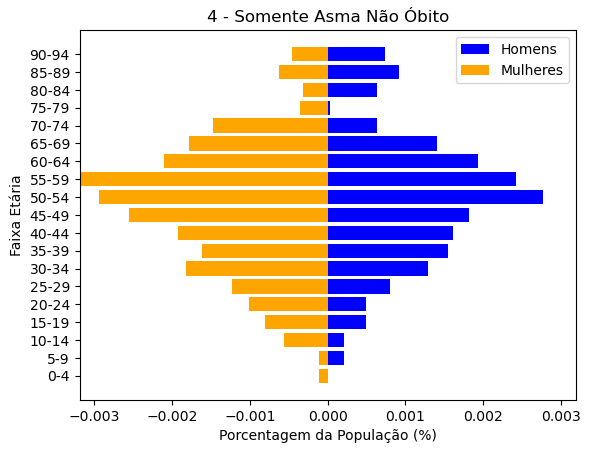

Faixa Etária: 0-4
T-Statistic: -0.993266221002741
P-Value: 0.3280320113057209
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: 0.9266261262504535
P-Value: 0.359415028676199
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: 0.4207180548497742
P-Value: 0.6775556442658748
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
T-Statistic: 1.1145042996299357
P-Value: 0.26965992941213857
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.785982836707558
P-Value: 0.0775078300203948
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: -2.616543990789184
P-Value: 0.

In [25]:
condicao_comorbidade = (
    (df['obito'] == False) &
    ((df['asma'] >= 1)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], "4 - Somente Asma Não Óbito")
compara_genero(df[condicao_comorbidade])

### Asma + outras comorbidades: óbito

100% da população: 2856225 --- Pessoas com essa condição 1372 (0.000480%)


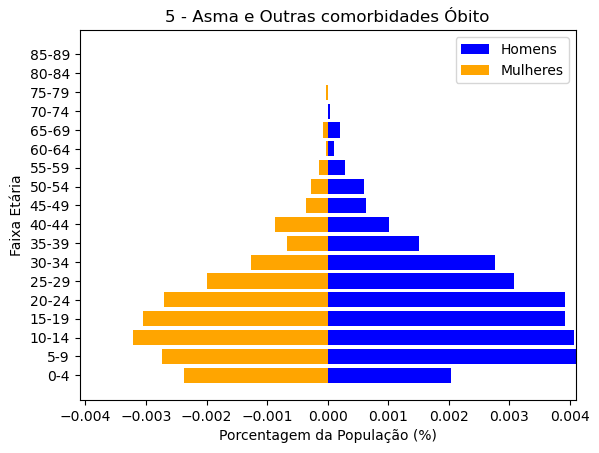

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
T-Statistic: 2.3224162032841145
P-Value: 0.059252627660253535
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
T-Statistic: 0.23281009858985938
P-Value: 0.820604743087964
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: -0.9576895273360968
P-Value: 0.34817872623110246
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
T-Statistic: 0.08778375111089146
P-Value: 0.9307211858

In [26]:
condicao_comorbidade = (
    (df['obito'] == True) &
    ((df['asma'] >= 3))
)
gera_piramide_etaria(df[condicao_comorbidade], "5 - Asma e Outras comorbidades Óbito")
compara_genero(df[condicao_comorbidade])

### Asma + outras comorbidades: não óbito

100% da população: 2856225 --- Pessoas com essa condição 2174 (0.000761%)


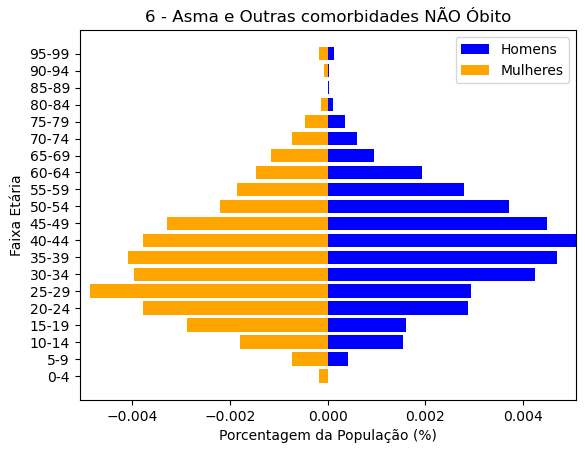

Faixa Etária: 0-4
T-Statistic: -0.5945883900105631
P-Value: 0.5708289866740257
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
T-Statistic: -1.702137264752106
P-Value: 0.14946440335595443
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 0.5859040724295657
P-Value: 0.5641846361944709
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: -0.3919583733050909
P-Value: 0.6973997877820257
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: 1.5906131287378702
P-Value: 0.1171331093525472
REJEITA hipótese nula: pode haver diferença significativa da média de

In [27]:
condicao_comorbidade = (
    (df['obito'] == False) &
    ((df['asma'] >= 3))
)
gera_piramide_etaria(df[condicao_comorbidade], "6 - Asma e Outras comorbidades NÃO Óbito")
compara_genero(df[condicao_comorbidade])

# Diabetes

### Diabetes todos dados

100% da população: 2856225 --- Pessoas com essa condição 10277 (0.003598%)


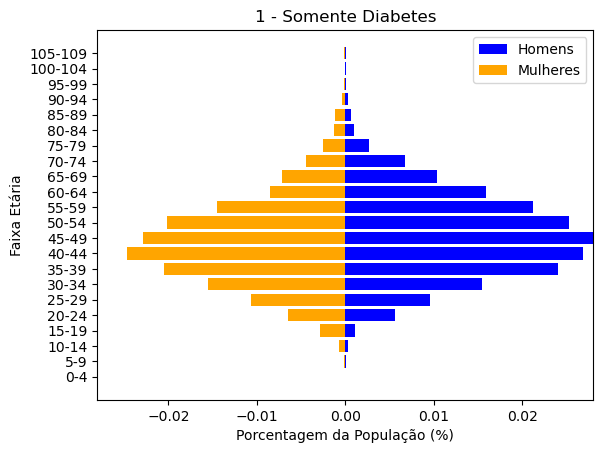

Faixa Etária: 0-4
T-Statistic: 1.6329931618554523
P-Value: 0.1778078083562211
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
T-Statistic: -2.1213203435596424
P-Value: 0.07814074941121574
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -0.052795285653583636
P-Value: 0.9585104599720404
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: -0.016104481234047677
P-Value: 0.9872177928694175
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 0.9216483535923616
P-Value: 0.36022810061348765
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: 0.6131281708522851
P

In [28]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'] >= 1)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], "1 - Somente Diabetes")
compara_genero(df[condicao_comorbidade])

### Diabetes e Outras comorbidades

100% da população: 2856225 --- Pessoas com essa condição 2672659 (0.935731%)


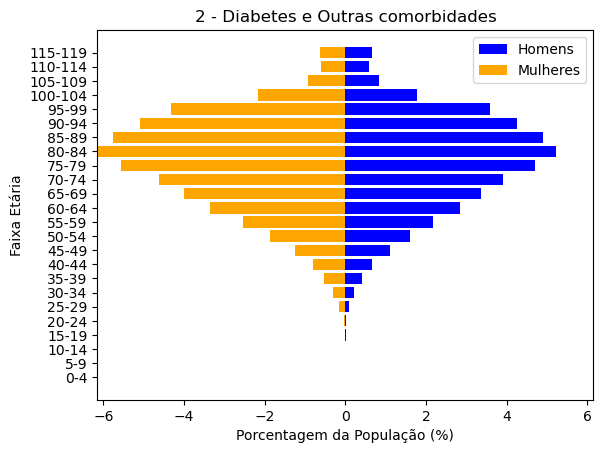

Faixa Etária: 0-4
T-Statistic: -0.08500475223137047
P-Value: 0.9322580776575906
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -2.16048821664662
P-Value: 0.03074178380419884
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -5.68716116499678
P-Value: 1.2989196755872453e-08
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 3.295130107633901
P-Value: 0.0009840650024624327
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: -4.812379058189644
P-Value: 1.492402118523245e-06
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.8242798601416572
P-Value: 0.06811089053245538
REJEITA hipótese nula: pode haver diferença significativa da média de ida

In [29]:
condicao_comorbidade = (
    (df['diabetes'] >= 1)
)
gera_piramide_etaria(df[condicao_comorbidade], "2 - Diabetes e Outras comorbidades")
compara_genero(df[condicao_comorbidade])

### Diabetes óbito

100% da população: 2856225 --- Pessoas com essa condição 2901 (0.001016%)


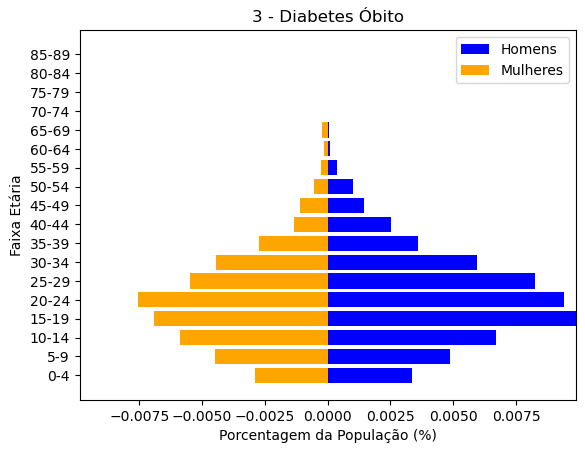

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
T-Statistic: 0.7385489458759976
P-Value: 0.4880526909920109
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 0.2817180849095055
P-Value: 0.7894473803217545
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: 2.232256340528499
P-Value: 0.04024251913580916
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: -1.0103674826922584
P-Value: 0.3181048708342034
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gê

In [30]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'] >= 1)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], "3 - Diabetes Óbito")
compara_genero(df[condicao_comorbidade])

### Diabetes não óbito

100% da população: 2856225 --- Pessoas com essa condição 110346 (0.038634%)


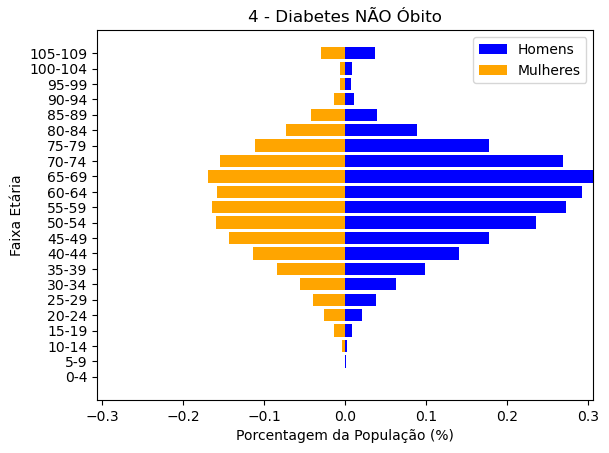

Faixa Etária: 0-4
T-Statistic: -3.915204179977774
P-Value: 9.352589970044786e-05
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: 0.8846504800469746
P-Value: 0.3768700594008271
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -0.7297009336172823
P-Value: 0.4660225672015743
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 0.6885366861605963
P-Value: 0.49134106086415064
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 0.9873927895581318
P-Value: 0.32355379640267856
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 3.6589577594037
P-Value: 0.00025606570649337583
ACEITA hipotese nula: não há diferença significativa da média 

In [31]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() >= 1)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], "4 - Diabetes NÃO Óbito")
compara_genero(df[condicao_comorbidade])

### Diabetes + outras comorbidades: óbito

100% da população: 2856225 --- Pessoas com essa condição 56768 (0.019875%)


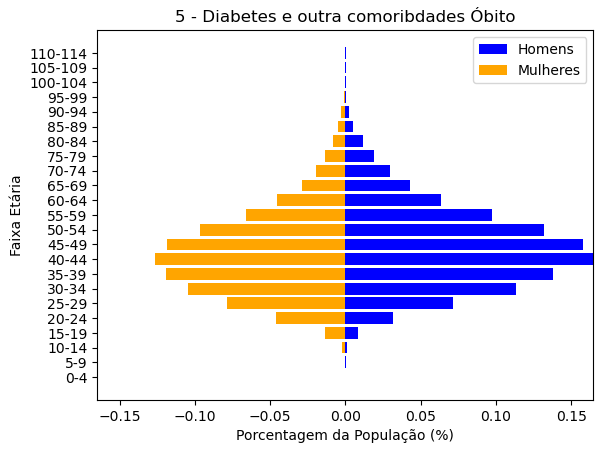

Faixa Etária: 0-4
T-Statistic: 1.8771552396096025
P-Value: 0.07176100615812472
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: 0.2976702788937934
P-Value: 0.7745952022538601
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: 2.4221288953071545
P-Value: 0.028561042510976423
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -2.7033754153582974
P-Value: 0.009865352919408427
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 1.7768996508495167
P-Value: 0.07772577918393288
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 0.35399614768458393
P-Value: 0.723607243027863
REJEITA hipótese nula: pode haver diferença significativa da média 

In [32]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['diabetes'] >= 1))
)
gera_piramide_etaria(df[condicao_comorbidade], "5 - Diabetes e outra comoribdades Óbito")
compara_genero(df[condicao_comorbidade])

### Diabetes + outras comorbidades: não óbito

100% da população: 2856225 --- Pessoas com essa condição 2428142 (0.850123%)


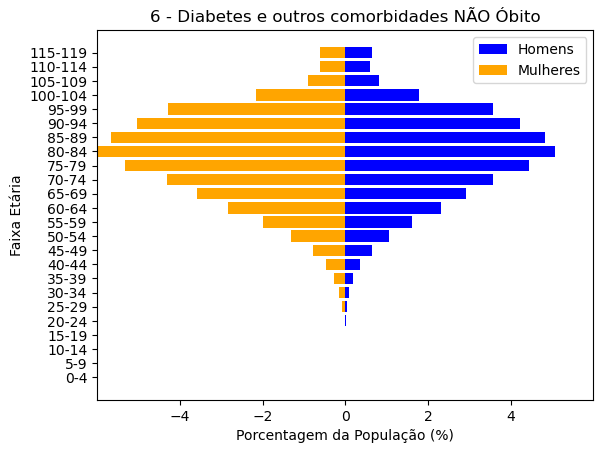

Faixa Etária: 0-4
T-Statistic: -0.15165577549665044
P-Value: 0.8794592873746307
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -2.058652701639867
P-Value: 0.03953508650002419
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -5.713597420070886
P-Value: 1.1124765428970365e-08
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 3.3515460422322225
P-Value: 0.0008038826439479157
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: -4.807974270616943
P-Value: 1.5256601656325558e-06
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.7975076468379105
P-Value: 0.07225620785040425
REJEITA hipótese nula: pode haver diferença significativa da média de

In [33]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['diabetes'] >= 3))
)
gera_piramide_etaria(df[condicao_comorbidade], "6 - Diabetes e outros comorbidades NÃO Óbito")
compara_genero(df[condicao_comorbidade])

# Doença Hematológica

### Doença Hematológica todos dados

100% da população: 2856225 --- Pessoas com essa condição 246 (0.000086%)


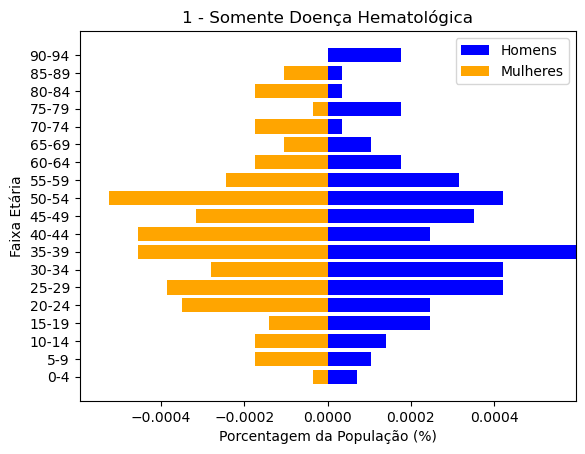

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
T-Statistic: 0.0
P-Value: 1.0
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: -1.3348476249438277
P-Value: 0.21866408228015294
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: -0.2933835768520027
P-Value: 0.7735330227427056
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
T-Statistic: 1.6773986942757027
P-Value: 0.10592541432542221
REJEITA hipótese nula: p

In [34]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'] >= 1)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], "1 - Somente Doença Hematológica")
compara_genero(df[condicao_comorbidade])

### Doença Hematológica e outras comorbidades

100% da população: 2856225 --- Pessoas com essa condição 130679 (0.045752%)


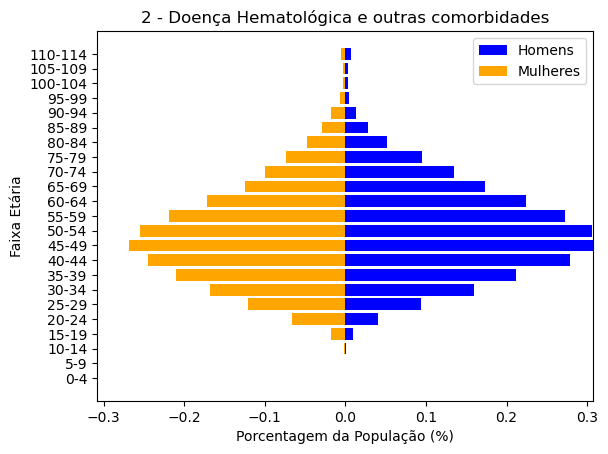

Faixa Etária: 0-4
T-Statistic: 0.026573797960338763
P-Value: 0.9788141550223155
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -0.8059002204335957
P-Value: 0.4214745305375017
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: 0.2514626776814404
P-Value: 0.8017370364769035
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -1.0226911070948153
P-Value: 0.30729754489119443
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 1.3700833845037117
P-Value: 0.17102010403523385
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.3949385213811412
P-Value: 0.16322477530363605
REJEITA hipótese nula: pode haver diferença significativa

In [35]:
condicao_comorbidade = (
    (df['doenca_hematologica'] >= 1)
)
gera_piramide_etaria(df[condicao_comorbidade], "2 - Doença Hematológica e outras comorbidades")
compara_genero(df[condicao_comorbidade])

### Doenca Hematologica óbito

100% da população: 2856225 --- Pessoas com essa condição 48 (0.000017%)


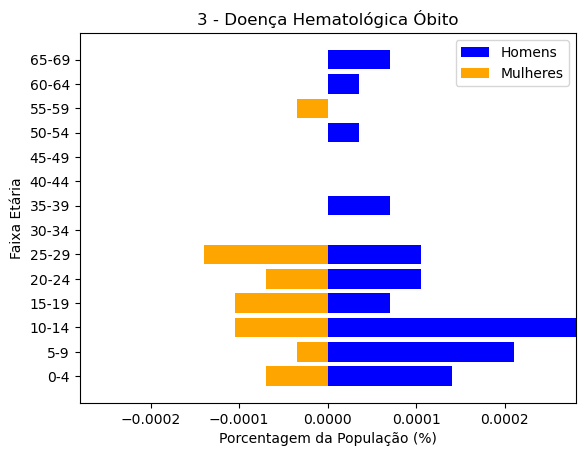

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 35-39
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 40-44
T-Statistic: 1.0249000771134849
P-Value: 0.35241319520191294
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 45-49
T-Statistic: -1.341640786499874
P-Value: 0.272228401224416
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faix

/home/andre/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [36]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'] >= 1)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], "3 - Doença Hematológica Óbito")
compara_genero(df[condicao_comorbidade])

###  Doenca Hematologica não óbito

100% da população: 2856225 --- Pessoas com essa condição 130679 (0.045752%)


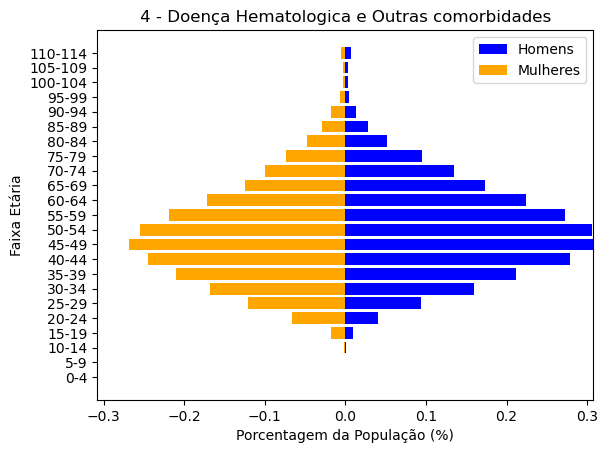

Faixa Etária: 0-4
T-Statistic: 0.026573797960338763
P-Value: 0.9788141550223155
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -0.8059002204335957
P-Value: 0.4214745305375017
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: 0.2514626776814404
P-Value: 0.8017370364769035
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -1.0226911070948153
P-Value: 0.30729754489119443
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 1.3700833845037117
P-Value: 0.17102010403523385
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.3949385213811412
P-Value: 0.16322477530363605
REJEITA hipótese nula: pode haver diferença significativa

In [37]:
condicao_comorbidade = (
    (df['doenca_hematologica'] >= 1)
)
gera_piramide_etaria(df[condicao_comorbidade], "4 - Doença Hematologica e Outras comorbidades")
compara_genero(df[condicao_comorbidade])

### Doenca Hematologica + outras comorbidades: óbito

100% da população: 2856225 --- Pessoas com essa condição 1377 (0.000482%)


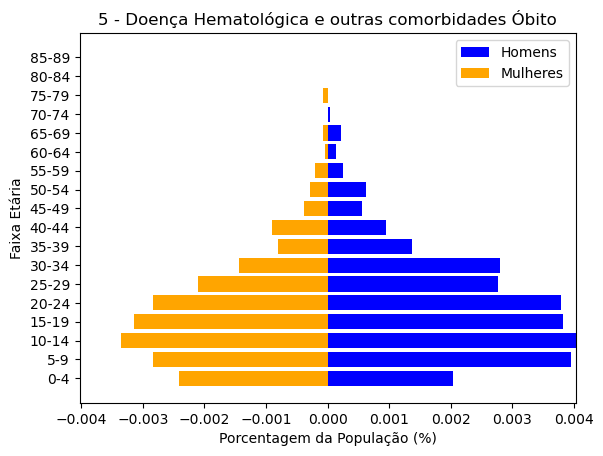

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
T-Statistic: 2.3224162032841145
P-Value: 0.059252627660253535
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
T-Statistic: 0.5881275124443369
P-Value: 0.5683249592314862
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: -1.0330251456445876
P-Value: 0.3118901276578495
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
T-Statistic: 0.3166761746255823
P-Value: 0.754118569493

In [38]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['doenca_hematologica'] >= 3))
)
gera_piramide_etaria(df[condicao_comorbidade], "5 - Doença Hematológica e outras comorbidades Óbito")
compara_genero(df[condicao_comorbidade])

### Doenca Hematologica + outras comorbidades: não óbito 

100% da população: 2856225 --- Pessoas com essa condição 2270 (0.000795%)


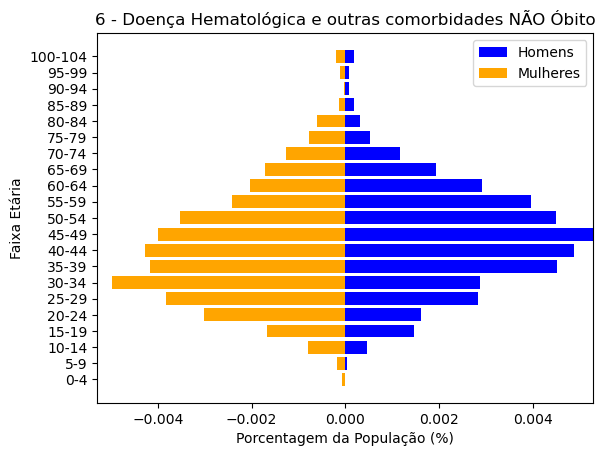

Faixa Etária: 0-4
T-Statistic: -1.094962251361352
P-Value: 0.3019691680264474
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -0.2927700218845597
P-Value: 0.788779981789736
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
T-Statistic: -1.6666666666666667
P-Value: 0.13951958313684432
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 0.7754767263356693
P-Value: 0.44563246564665626
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: -0.33576729892922474
P-Value: 0.7390508886577313
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: 1.812973165790425
P-Valu

In [39]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['doenca_hematologica'] >= 3))
)
gera_piramide_etaria(df[condicao_comorbidade], "6 - Doença Hematológica e outras comorbidades NÃO Óbito")
compara_genero(df[condicao_comorbidade])

# Cardiopatia

### Cardiopatia todos dados

100% da população: 2856225 --- Pessoas com essa condição 18459 (0.006463%)


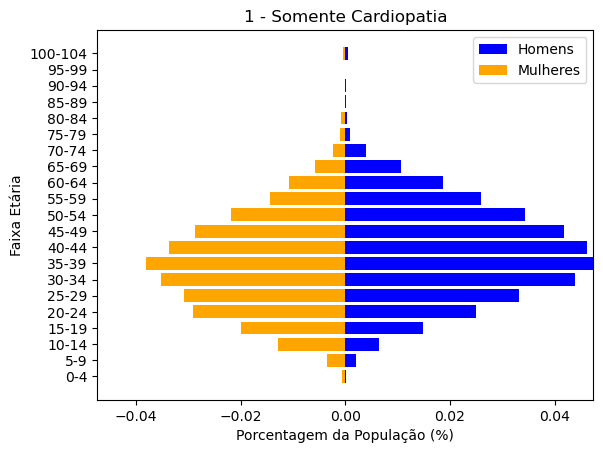

Faixa Etária: 0-4
T-Statistic: 0.7576655183644638
P-Value: 0.45602665548419796
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
T-Statistic: 1.3570642056474582
P-Value: 0.18523008361820495
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 0.14293278868868511
P-Value: 0.8868752746770607
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: 1.829581747575773
P-Value: 0.06893973716620584
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: 1.2199658302541811
P-Value: 0.2230

In [40]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'] >= 1)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], "1 - Somente Cardiopatia")
compara_genero(df[condicao_comorbidade])

### Cardiopatia e outra comorbidades

100% da população: 2856225 --- Pessoas com essa condição 2684443 (0.939857%)


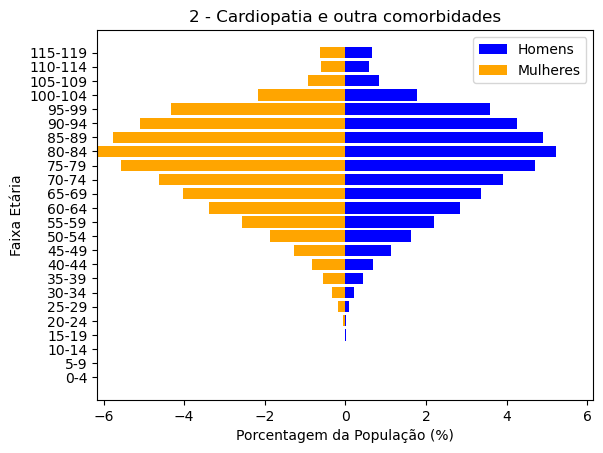

Faixa Etária: 0-4
T-Statistic: -0.07641809340419049
P-Value: 0.9390868926684641
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -2.160112938557755
P-Value: 0.030770818834722154
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -5.65030792094995
P-Value: 1.610351941550463e-08
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 3.2956144003289367
P-Value: 0.0009823705559300069
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: -4.781594200185628
P-Value: 1.740197847848913e-06
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.8266634671718707
P-Value: 0.06775150004611138
REJEITA hipótese nula: pode haver diferença significativa da média de i

In [41]:
condicao_comorbidade = (
    (df['cardiopatia'] >= 1)
)
gera_piramide_etaria(df[condicao_comorbidade], "2 - Cardiopatia e outra comorbidades")
compara_genero(df[condicao_comorbidade])

### Cardiopatia óbito

100% da população: 2856225 --- Pessoas com essa condição 5141 (0.001800%)


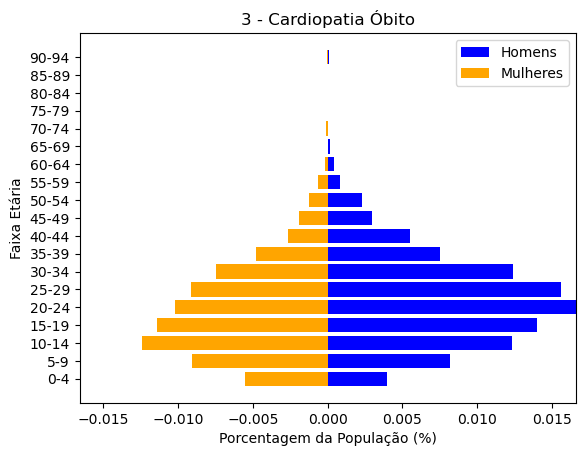

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
T-Statistic: 0.6064784348631227
P-Value: 0.5527057116859824
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: 1.18546517326818
P-Value: 0.24265903059647762
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
T-Statistic: -1.2840302070519574
P-Value: 0.20209842262989305
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêner

In [42]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'] >= 1)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], "3 - Cardiopatia Óbito")
compara_genero(df[condicao_comorbidade])

### Cardiopatia não óbito

100% da população: 2856225 --- Pessoas com essa condição 13204 (0.004623%)


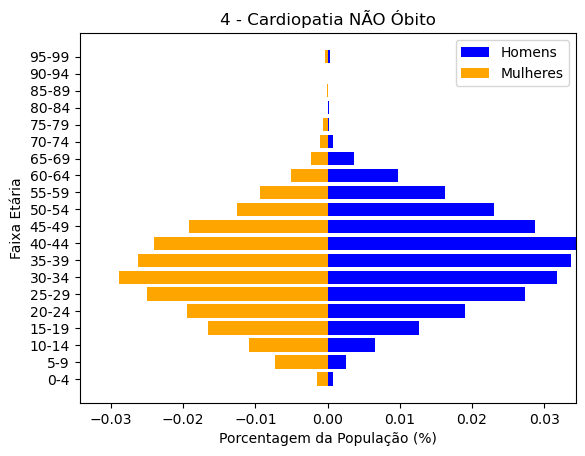

Faixa Etária: 0-4
T-Statistic: 1.1721969977468454
P-Value: 0.25489229639942523
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
T-Statistic: 1.5899317584830484
P-Value: 0.12441795362557245
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 0.5692449245709909
P-Value: 0.5717384524909261
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: 1.7121793658833955
P-Value: 0.08874232550222824
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: 1.0103339563338096
P-Value: 0.3129

In [43]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'] >= 1)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], "4 - Cardiopatia NÃO Óbito")
compara_genero(df[condicao_comorbidade])

### Cardiopatia + outras comorbidades: óbito

100% da população: 2856225 --- Pessoas com essa condição 631 (0.000221%)


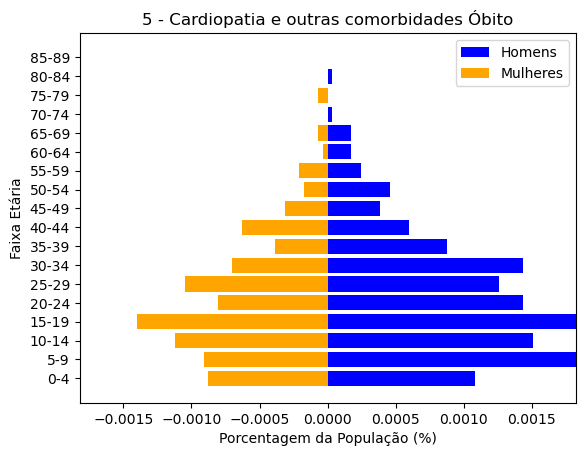

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
T-Statistic: 2.0225995873897276
P-Value: 0.09904135202098961
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
T-Statistic: 0.0959026819995961
P-Value: 0.9253227405758162
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: -1.0977532532687875
P-Value: 0.2885584552067158
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
T-Statistic: 0.41223728244698465
P-Value: 0.685033543591

In [44]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['cardiopatia'] >= 3))
)
gera_piramide_etaria(df[condicao_comorbidade], "5 - Cardiopatia e outras comorbidades Óbito")
compara_genero(df[condicao_comorbidade])

### Cardiopatia + outras comorbidades: não óbito

100% da população: 2856225 --- Pessoas com essa condição 2376899 (0.832182%)


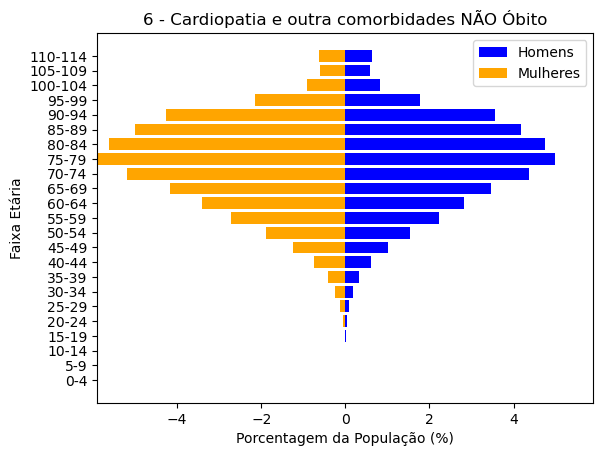

Faixa Etária: 0-4
T-Statistic: -0.06563539923739108
P-Value: 0.947668470476487
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -2.1105674141394424
P-Value: 0.03481676772426919
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -5.6687298449255845
P-Value: 1.4466124333741741e-08
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 3.3270700602848677
P-Value: 0.0008779260554278977
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: -5.009476358530484
P-Value: 5.461982015929321e-07
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.6779841709748968
P-Value: 0.0933513795467294
REJEITA hipótese nula: pode haver diferença significativa da média de 

In [45]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['cardiopatia'] >= 3))
)
gera_piramide_etaria(df[condicao_comorbidade], "6 - Cardiopatia e outra comorbidades NÃO Óbito")
compara_genero(df[condicao_comorbidade])

**Observação**: As duas distribuições parecem iguais

# Doença Hepática

### Doença Hepática Todos dados

100% da população: 2856225 --- Pessoas com essa condição 177 (0.000062%)


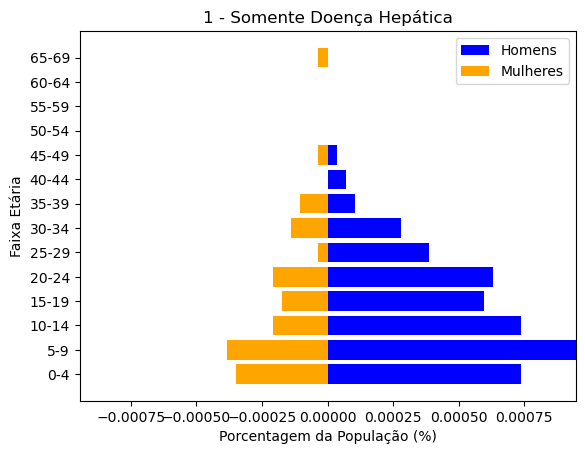

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
T-Statistic: 0.6708203932499346
P-Value: 0.5390795735253255
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: 2.252792727943491
P-Value: 0.04795177394665678
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 45-49
T-Statistic: 1.3887301496588274
P-Value: 0.17881528109208414
REJEITA hi

In [46]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'] >= 1)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], "1 - Somente Doença Hepática")
compara_genero(df[condicao_comorbidade])

### Doença Hepática e outras comorbidades

100% da população: 2856225 --- Pessoas com essa condição 130240 (0.045599%)


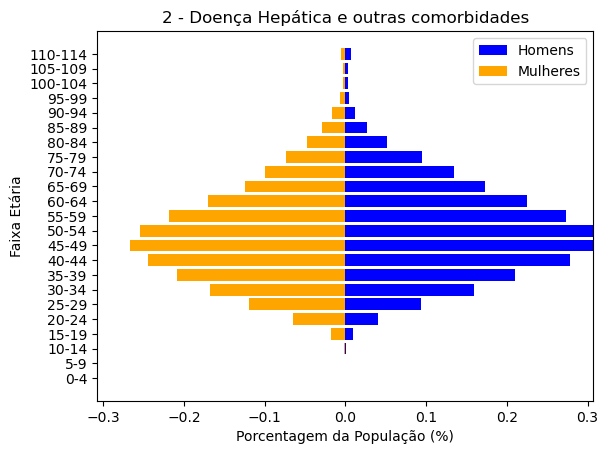

Faixa Etária: 0-4
T-Statistic: 0.14341744285771116
P-Value: 0.8860407499803319
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -0.8227169331553741
P-Value: 0.4119328835951248
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: 0.16697035436064483
P-Value: 0.8675829036612124
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -0.8471305470612985
P-Value: 0.39763316037001584
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 1.5070286613212278
P-Value: 0.13217661137874248
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.3314642018669622
P-Value: 0.18322375279324882
REJEITA hipótese nula: pode haver diferença significativa

In [47]:
condicao_comorbidade = (
    (df['doenca_hepatica'] >= 1)
)
gera_piramide_etaria(df[condicao_comorbidade], "2 - Doença Hepática e outras comorbidades")
compara_genero(df[condicao_comorbidade])

### Doenca Hepatica óbito

100% da população: 2856225 --- Pessoas com essa condição 23 (0.000008%)


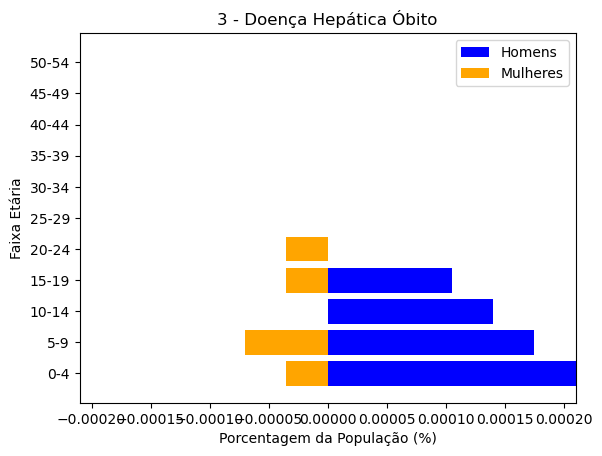

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 35-39
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 40-44
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 45-49
T-Statistic: 0.8594799233872428
P-Value: 0.4293481425392472
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 50-54
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária

In [48]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'] >= 1)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '3 - Doença Hepática Óbito')
compara_genero(df[condicao_comorbidade])

**Observação**: Há muito mais homens que mulheres para doença hepática

### Doenca Hepatica não óbito

100% da população: 2856225 --- Pessoas com essa condição 72 (0.000025%)


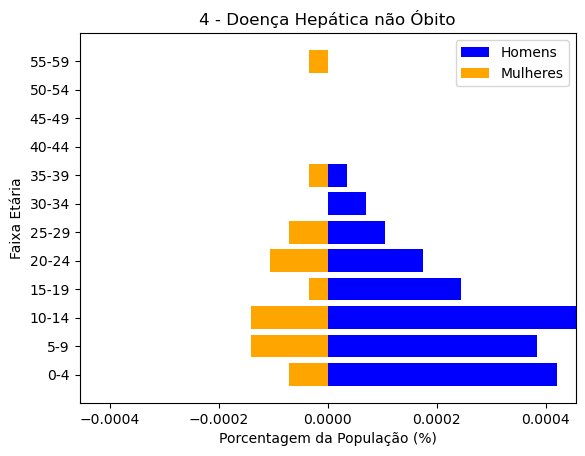

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
T-Statistic: 0.35540932665545416
P-Value: 0.7458032603562921
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: 1.0606601717798212
P-Value: 0.3296618791252536
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 45-49
T-Statistic: 1.0988313521907151
P-Value: 0.2891662816158567
REJEI

In [49]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'] >= 1)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '4 - Doença Hepática não Óbito')
compara_genero(df[condicao_comorbidade])

### Doenca Hepatica + outras comorbidades: óbito

100% da população: 2856225 --- Pessoas com essa condição 46360 (0.016231%)


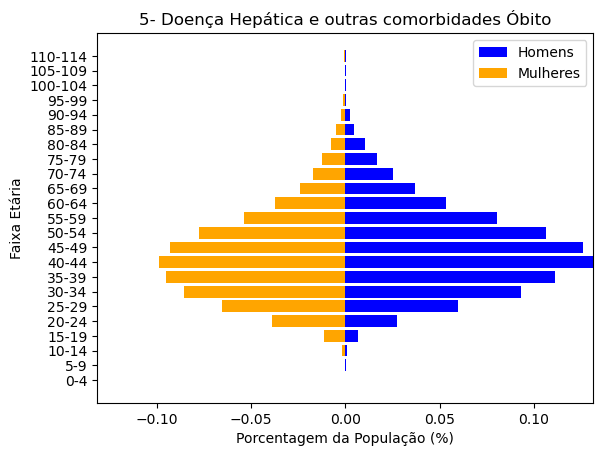

Faixa Etária: 0-4
T-Statistic: 1.3879042618964212
P-Value: 0.17651393170686924
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: 0.2976702788937934
P-Value: 0.7745952022538601
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: 2.4221288953071545
P-Value: 0.028561042510976423
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -2.834550950155404
P-Value: 0.006964121621756784
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 1.7596699056760314
P-Value: 0.08079812348420429
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 0.3765972513293688
P-Value: 0.7067789052551028
REJEITA hipótese nula: pode haver diferença significativa da média d

In [50]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['doenca_hepatica'] >= 1))
)
gera_piramide_etaria(df[condicao_comorbidade], '5- Doença Hepática e outras comorbidades Óbito')
compara_genero(df[condicao_comorbidade])

### Doenca Hepatica + outras comorbidades: não óbito

100% da população: 2856225 --- Pessoas com essa condição 83880 (0.029367%)


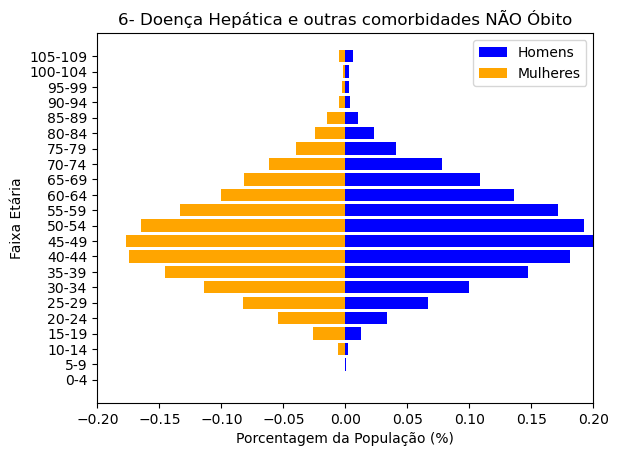

Faixa Etária: 0-4
T-Statistic: -0.3300527115356181
P-Value: 0.7415689223795676
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -0.9267323022267402
P-Value: 0.35559494862687524
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -0.35079583349155385
P-Value: 0.7262001027388278
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 0.14623457813719365
P-Value: 0.8838589630246682
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 0.91439862275305
P-Value: 0.3608165426001101
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.2909035769793031
P-Value: 0.19695715361218882
REJEITA hipótese nula: pode haver diferença significativa d

In [51]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['doenca_hepatica'] >= 1))
)
gera_piramide_etaria(df[condicao_comorbidade], '6- Doença Hepática e outras comorbidades NÃO Óbito')
compara_genero(df[condicao_comorbidade])

# Doença Neurológica

### Doença Neurológica todos dados

100% da população: 2856225 --- Pessoas com essa condição 1442 (0.000505%)


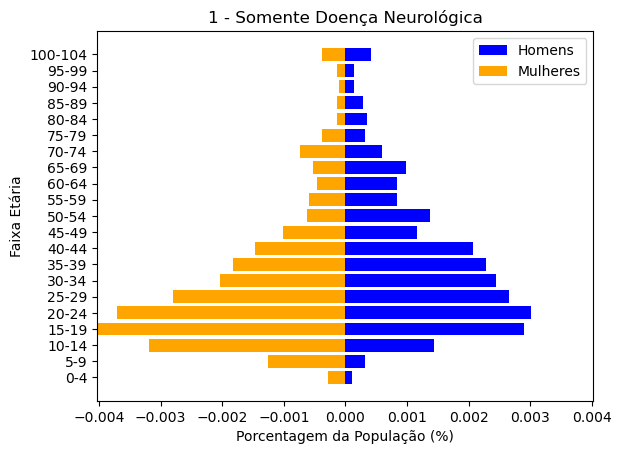

Faixa Etária: 0-4
T-Statistic: -0.6625429878146332
P-Value: 0.5148297306776601
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: 0.42008402520840293
P-Value: 0.6890522264439654
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: 4.157609203101502
P-Value: 0.008844553648948757
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -1.0403129732205987
P-Value: 0.3226933371971654
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 1.114489683246689
P-Value: 0.286893048750868
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 0.4541475531146221
P-Value: 0.6551511303971959
REJEITA hipótese nula: pode haver diferença significativa da média 

In [52]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'] >= 1)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '1 - Somente Doença Neurológica')
compara_genero(df[condicao_comorbidade])

### Doença Neurológica e outras comorbidades

100% da população: 2856225 --- Pessoas com essa condição 133723 (0.046818%)


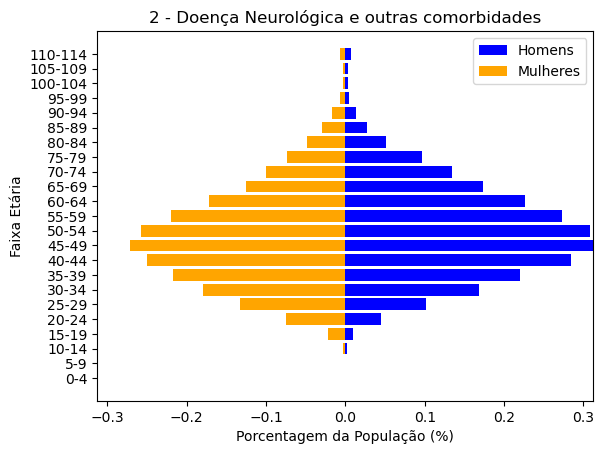

Faixa Etária: 0-4
T-Statistic: -0.2300065551492339
P-Value: 0.8182075758487505
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -0.5811765160005601
P-Value: 0.5619050488666978
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: 0.5587064557139197
P-Value: 0.5770234142214403
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -0.860138982569337
P-Value: 0.39039248494418777
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 1.4355818001973737
P-Value: 0.1514832945610381
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.3231402786556459
P-Value: 0.18597407684433465
REJEITA hipótese nula: pode haver diferença significativa da

In [53]:
condicao_comorbidade = (
    (df['doenca_neurologica'] >= 1)
)
gera_piramide_etaria(df[condicao_comorbidade], "2 - Doença Neurológica e outras comorbidades")
compara_genero(df[condicao_comorbidade])

### Doenca Neurologica óbito

100% da população: 2856225 --- Pessoas com essa condição 600 (0.000210%)


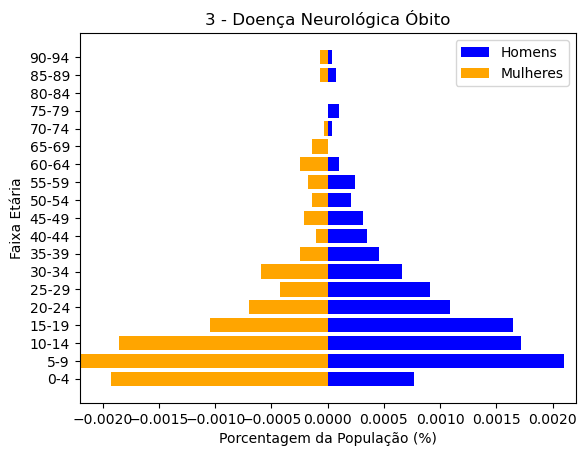

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
T-Statistic: 1.0
P-Value: 0.42264973081037427
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
T-Statistic: 0.04588314677411561
P-Value: 0.9645280656541346
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: 1.3506755066722491
P-Value: 0.2065698725439183
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
T-Statistic: -1.0174940381383342
P-Value: 0.3386995194292746
REJEITA hi

In [54]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'] >= 1)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '3 - Doença Neurológica Óbito')
compara_genero(df[condicao_comorbidade])

### Doenca Neurologica não óbito

100% da população: 2856225 --- Pessoas com essa condição 808 (0.000283%)


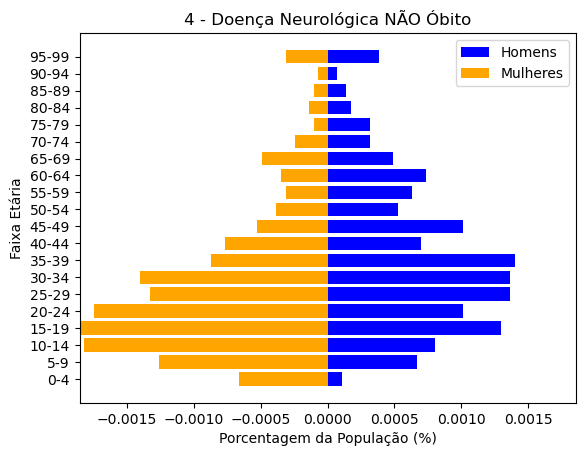

Faixa Etária: 0-4
T-Statistic: -0.5505386303477302
P-Value: 0.5887180243207534
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: 0.0
P-Value: 1.0
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: 4.157609203101502
P-Value: 0.008844553648948757
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 0.10466430427046136
P-Value: 0.9195780394473212
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 0.6638128365845191
P-Value: 0.5218196418002794
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 0.2160246899469279
P-Value: 0.8320843205248203
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faix

In [55]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'] >= 1)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '4 - Doença Neurológica NÃO Óbito')
compara_genero(df[condicao_comorbidade])

### Doenca Neurologica + outras comorbidades: óbito

100% da população: 2856225 --- Pessoas com essa condição 1267 (0.000444%)


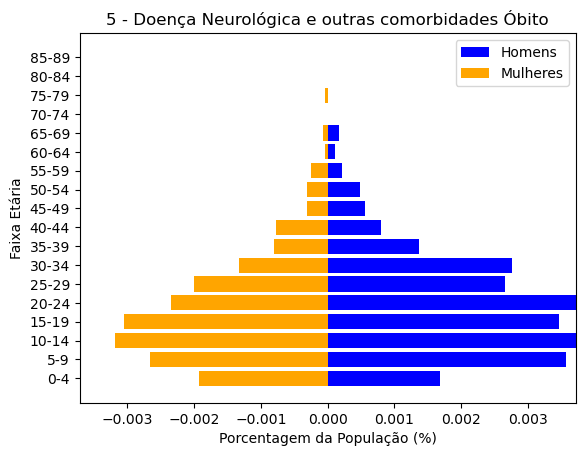

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
T-Statistic: 2.2751099412156766
P-Value: 0.0719770344428581
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
T-Statistic: 0.8669829917620587
P-Value: 0.4044669426172586
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: -1.6865591022407578
P-Value: 0.10648902916233328
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
T-Statistic: 0.39428839373770475
P-Value: 0.697000283747

In [56]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['doenca_neurologica'] >= 3))
)
gera_piramide_etaria(df[condicao_comorbidade], '5 - Doença Neurológica e outras comorbidades Óbito')
compara_genero(df[condicao_comorbidade])

### Doenca Neurologica + outras comorbidades: não óbito

100% da população: 2856225 --- Pessoas com essa condição 2148 (0.000752%)


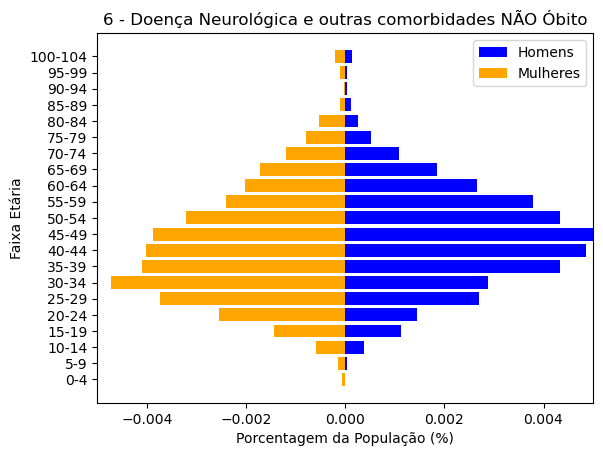

Faixa Etária: 0-4
T-Statistic: -1.7200263271350635
P-Value: 0.1237406547037751
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
T-Statistic: -1.8898223650461377
P-Value: 0.13177756749413513
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 0.9696241231378959
P-Value: 0.34381473874193613
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: -0.8389114638648867
P-Value: 0.4070552149251474
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: 1.4346305972878108
P-Value: 0.15633804282706706
REJEITA hipótese nula: pode haver diferença significativa da média

In [57]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['doenca_neurologica'] >= 3))
)
gera_piramide_etaria(df[condicao_comorbidade], '6 - Doença Neurológica e outras comorbidades NÃO Óbito')
compara_genero(df[condicao_comorbidade])

# Doenca Renal

### Doenca Renal todos dados

100% da população: 2856225 --- Pessoas com essa condição 748 (0.000262%)


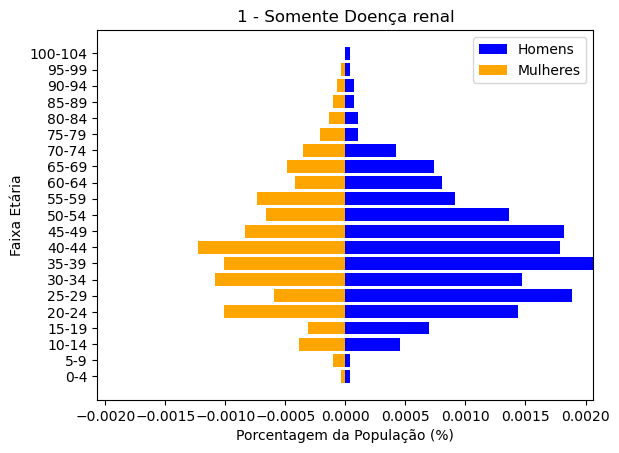

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
T-Statistic: -0.2773500981126146
P-Value: 0.8075499102701248
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -0.7745966692414848
P-Value: 0.4950253460597103
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 0.2548235957188119
P-Value: 0.8090084953266757
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.3416407864998738
P-Value: 0.22160141910919
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: -1.7791539641187348
P-Value: 0.0904180111382032
REJEITA hipótese nula: pode haver diferença significativa da média de i

In [58]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'] >= 1)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '1 - Somente Doença renal')
compara_genero(df[condicao_comorbidade])

### Doença renal e outras comorbidades

100% da população: 2856225 --- Pessoas com essa condição 2645732 (0.926304%)


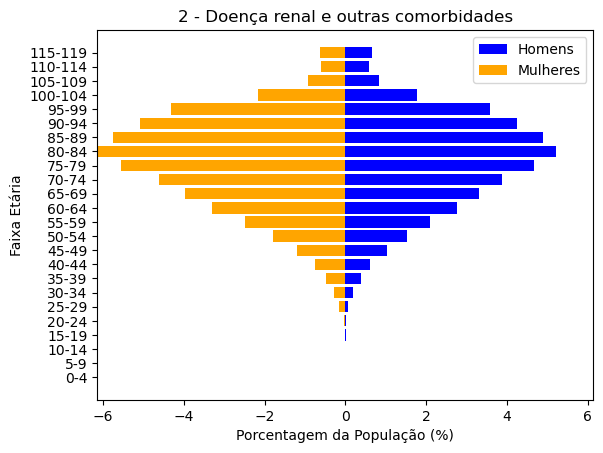

Faixa Etária: 0-4
T-Statistic: -0.09901121387138676
P-Value: 0.9211299089793181
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -2.149565632015214
P-Value: 0.031596548274695845
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -5.659135071312821
P-Value: 1.5297362408159135e-08
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 3.281463075521846
P-Value: 0.0010330145395405284
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: -4.8053960881891715
P-Value: 1.5454440355401102e-06
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.8378199116323997
P-Value: 0.06609005719873369
REJEITA hipótese nula: pode haver diferença significativa da média d

In [59]:
condicao_comorbidade = (
    (df['doenca_renal'] >= 1)
)
gera_piramide_etaria(df[condicao_comorbidade], "2 - Doença renal e outras comorbidades")
compara_genero(df[condicao_comorbidade])

### Doenca Renal óbito

100% da população: 2856225 --- Pessoas com essa condição 294 (0.000103%)


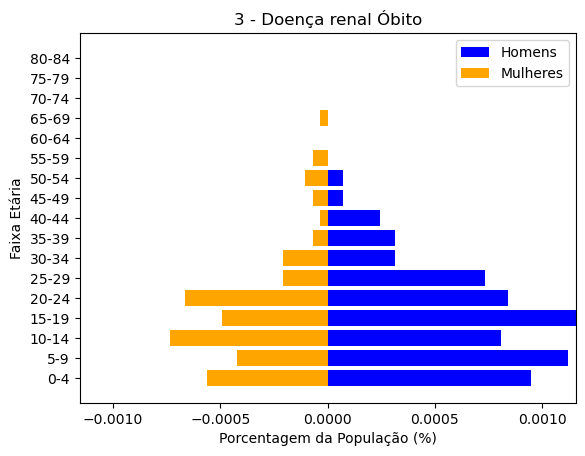

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
T-Statistic: -1.5303383560085573
P-Value: 0.2234265316037078
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: 1.3416407864998738
P-Value: 0.3117527983883147
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 45-49
T-Statistic: 0.2417468892076158
P-Value: 0.8143944955603165
REJEI

In [60]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'] >= 1)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '3 - Doença renal Óbito')
compara_genero(df[condicao_comorbidade])

### Doenca Renal não óbito

100% da população: 2856225 --- Pessoas com essa condição 414 (0.000145%)


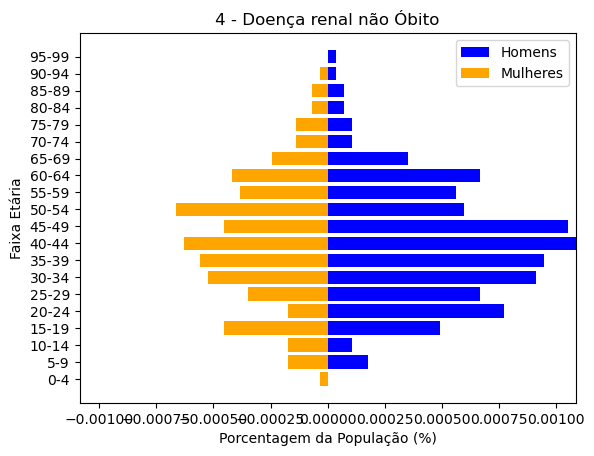

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
T-Statistic: -0.2773500981126146
P-Value: 0.8075499102701248
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -1.0
P-Value: 0.42264973081037427
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 0.2548235957188119
P-Value: 0.8090084953266757
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.5714285714285705
P-Value: 0.17688561798905428
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: -1.1137149082726767
P-Value: 0.28293013868627936
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre

In [61]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'] >= 1)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '4 - Doença renal não Óbito')
compara_genero(df[condicao_comorbidade])

### Doenca Renal + outras comorbidades: óbito

100% da população: 2856225 --- Pessoas com essa condição 1283 (0.000449%)


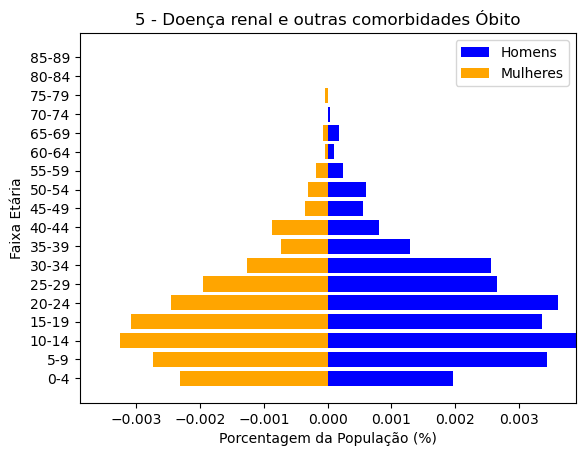

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
T-Statistic: 3.14970394174356
P-Value: 0.025387404230428116
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
T-Statistic: 0.06631393050534473
P-Value: 0.948434957718096
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: -0.7725846128313482
P-Value: 0.44731041119383264
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
T-Statistic: -0.15374562050610344
P-Value: 0.8790957901926537

In [62]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['doenca_renal'] >= 3))
)
gera_piramide_etaria(df[condicao_comorbidade], '5 - Doença renal e outras comorbidades Óbito')
compara_genero(df[condicao_comorbidade])

### Doenca Renal + outras comorbidades: não óbito

100% da população: 2856225 --- Pessoas com essa condição 2508508 (0.878260%)


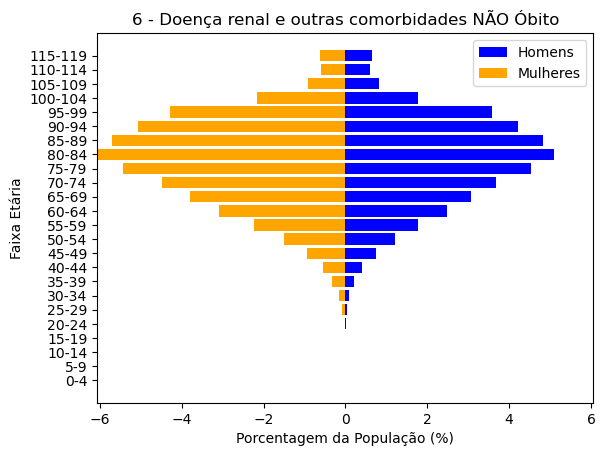

Faixa Etária: 0-4
T-Statistic: -0.08897729940198935
P-Value: 0.9291004432320638
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -2.088160794334426
P-Value: 0.03679071849147275
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -5.717039452415374
P-Value: 1.0901836445266458e-08
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 3.347294377468124
P-Value: 0.0008163130833538112
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: -4.774886223545783
P-Value: 1.7992183003296402e-06
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.7491481645160858
P-Value: 0.08026656905794316
REJEITA hipótese nula: pode haver diferença significativa da média de 

In [63]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['doenca_renal'] >= 3))
)
gera_piramide_etaria(df[condicao_comorbidade], '6 - Doença renal e outras comorbidades NÃO Óbito')
compara_genero(df[condicao_comorbidade])

# Imunodepressao

### Imunodepressao todos dados

100% da população: 2856225 --- Pessoas com essa condição 1240 (0.000434%)


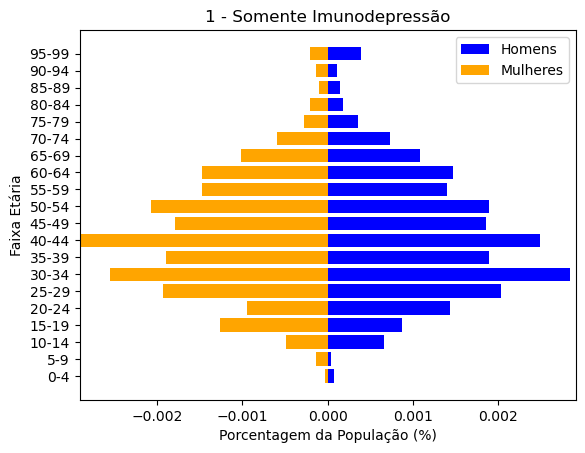

Faixa Etária: 0-4
T-Statistic: 1.4053565256692935
P-Value: 0.18028797043002165
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: 0.40922379553556726
P-Value: 0.6993154669912416
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -0.9854478901196404
P-Value: 0.3696576707467936
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 1.0111682767174281
P-Value: 0.33834696299142736
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: -0.6828633596421094
P-Value: 0.5044613269484675
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.3341809193570675
P-Value: 0.19052334732299198
REJEITA hipótese nula: pode haver diferença significativa 

In [64]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'] >= 1)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '1 - Somente Imunodepressão')
compara_genero(df[condicao_comorbidade])

### Imunodepressão e outras comorbidades

100% da população: 2856225 --- Pessoas com essa condição 2644824 (0.925986%)


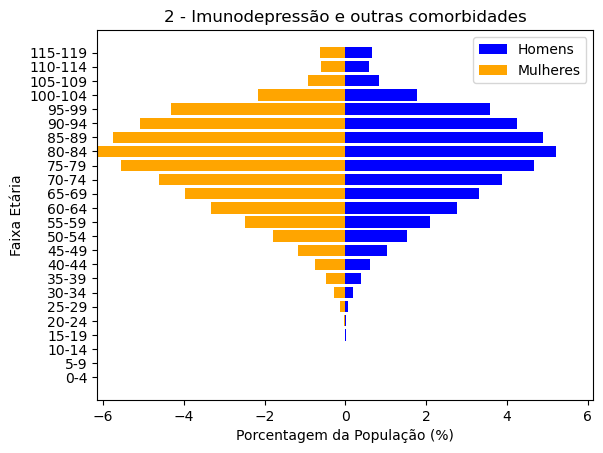

Faixa Etária: 0-4
T-Statistic: -0.06724131819664235
P-Value: 0.9463899596756737
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -2.144892607530575
P-Value: 0.03196842237500133
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -5.657907031147992
P-Value: 1.5407113995821673e-08
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 3.3020216331112215
P-Value: 0.0009602054152802297
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: -4.794258749405071
P-Value: 1.6338111177954638e-06
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.8348067460770925
P-Value: 0.06653544080016335
REJEITA hipótese nula: pode haver diferença significativa da média de

In [65]:
condicao_comorbidade = (
    (df['imunodepressao'] >= 1)
)
gera_piramide_etaria(df[condicao_comorbidade], "2 - Imunodepressão e outras comorbidades")
compara_genero(df[condicao_comorbidade])

### Imunodepressao óbito

100% da população: 2856225 --- Pessoas com essa condição 473 (0.000166%)


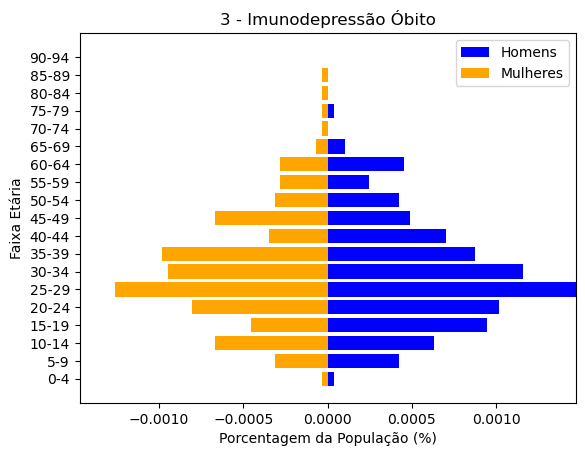

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
T-Statistic: -0.10444659357341944
P-Value: 0.923406290999073
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: 0.2944210850236939
P-Value: 0.7716287067585623
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: 0.5139530863600426
P-Value: 0.615908971586562
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
T-Statistic: 0.48124250043229966
P-Value: 0.63583987052737

In [66]:
condicao_comorbidade = (
    (df['obito']== True) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'] >= 1)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '3 - Imunodepressão Óbito')
compara_genero(df[condicao_comorbidade])

### Imunodepressao não óbito

100% da população: 2856225 --- Pessoas com essa condição 764 (0.000267%)


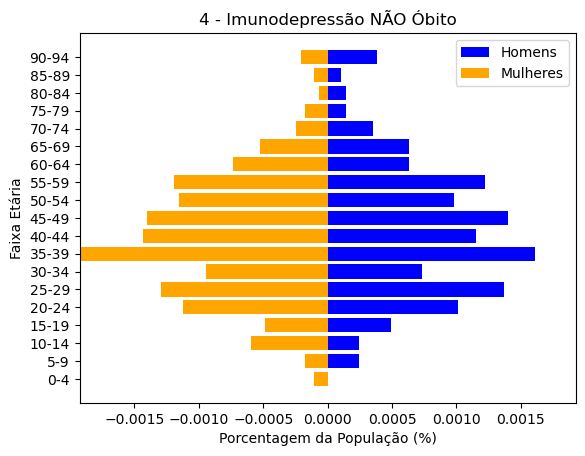

Faixa Etária: 0-4
T-Statistic: 1.4053565256692935
P-Value: 0.18028797043002165
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: 0.9999999999999998
P-Value: 0.373900966300059
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -0.6432675209026768
P-Value: 0.5550731521897743
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 1.0377490433255412
P-Value: 0.33389914069153315
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: -1.210229327968724
P-Value: 0.24491737560158938
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.4779089047663463
P-Value: 0.14952123387458022
REJEITA hipótese nula: pode haver diferença significativa da

In [67]:
condicao_comorbidade = (
    (df['obito']== False) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'] >= 1)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '4 - Imunodepressão NÃO Óbito')
compara_genero(df[condicao_comorbidade])

### Imunodepressao + outras comorbidades: óbito

100% da população: 2856225 --- Pessoas com essa condição 1357 (0.000475%)


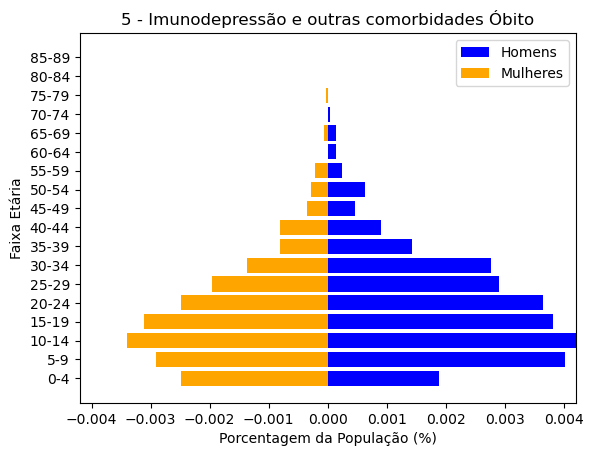

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
T-Statistic: 1.9694638556693236
P-Value: 0.12024334063356444
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
T-Statistic: 0.5881275124443369
P-Value: 0.5683249592314862
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: -1.0330251456445876
P-Value: 0.3118901276578495
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
T-Statistic: 0.23962399657662056
P-Value: 0.812945133144

In [68]:
condicao_comorbidade = (
    (df['obito'] == True) &
    (df['imunodepressao'] >= 3)
)
gera_piramide_etaria(df[condicao_comorbidade], '5 - Imunodepressão e outras comorbidades Óbito')
compara_genero(df[condicao_comorbidade])

### Imunodepressao + outras comorbidades: não óbito

100% da população: 2856225 --- Pessoas com essa condição 2501994 (0.875979%)


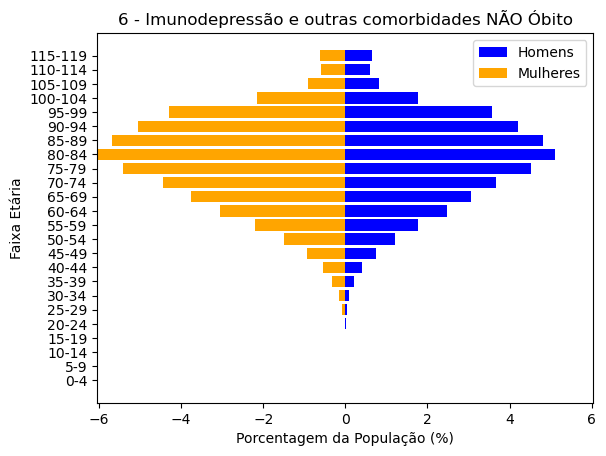

Faixa Etária: 0-4
T-Statistic: -0.07695089828380068
P-Value: 0.9386630323003641
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -2.1770630204384678
P-Value: 0.029482690866561637
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -5.669973863039524
P-Value: 1.4361402237196611e-08
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 3.3426105200104215
P-Value: 0.0008302143771847719
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: -4.89269671047478
P-Value: 9.953232144014241e-07
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.6763825939562382
P-Value: 0.09366445725746717
REJEITA hipótese nula: pode haver diferença significativa da média de

In [69]:
condicao_comorbidade = (
    (df['obito']== False) &
    ((df['imunodepressao'] >= 3))
)
gera_piramide_etaria(df[condicao_comorbidade], '6 - Imunodepressão e outras comorbidades NÃO Óbito')
compara_genero(df[condicao_comorbidade])

# Obesidade

### Obesidade todos dados

100% da população: 2856225 --- Pessoas com essa condição 3059 (0.001071%)


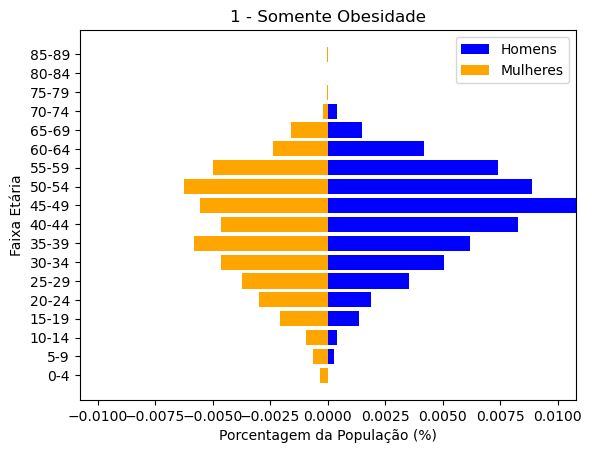

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
T-Statistic: -1.4014971899370798
P-Value: 0.18141666334210524
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: -1.3421836120934352
P-Value: 0.18302862851684232
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 0.5609878015407144
P-Value: 0.5754810450540213
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: 0.10344795767963198
P-Value: 0.9176665311672604
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: 0.46891195636485977
P-Value: 0.6

In [70]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'] >= 1)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '1 - Somente Obesidade')
compara_genero(df[condicao_comorbidade])

### Obesidade e outras comorbidades Óbito

100% da população: 2856225 --- Pessoas com essa condição 136047 (0.047632%)


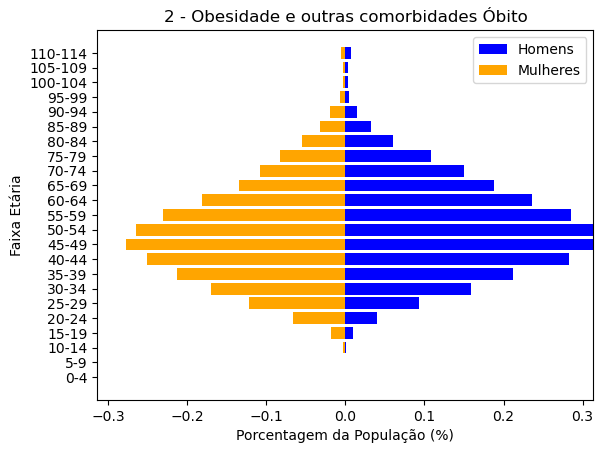

Faixa Etária: 0-4
T-Statistic: -0.21592650585789958
P-Value: 0.8291683537322503
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -0.9612772818704258
P-Value: 0.33790995335636
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -0.24360890028510482
P-Value: 0.8078142670590743
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -0.842055798333856
P-Value: 0.40041434076006077
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 0.811725228769463
P-Value: 0.4171520085776157
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.6825441720651588
P-Value: 0.09263184016917576
REJEITA hipótese nula: pode haver diferença significativa da

In [71]:
condicao_comorbidade = (
    (df['obesidade'] >= 1)
)
gera_piramide_etaria(df[condicao_comorbidade], "2 - Obesidade e outras comorbidades Óbito")
compara_genero(df[condicao_comorbidade])

###  Obesidade óbito

100% da população: 2856225 --- Pessoas com essa condição 701 (0.000245%)


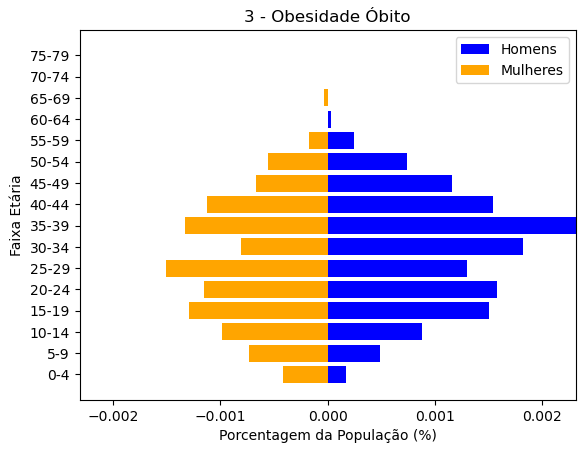

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
T-Statistic: -0.23414645289542263
P-Value: 0.8195954050015916
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: -0.5896002433398116
P-Value: 0.5592458488984371
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: -0.3732354726375888
P-Value: 0.7105509630894553
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: 0.10691504660366184
P-Value: 0.9151457031454995
REJEITA hipótese nula: pode haver diferença significativa da média de idade

In [72]:
condicao_comorbidade = (
    (df['obito']== True) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'] >= 1)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '3 - Obesidade Óbito')
compara_genero(df[condicao_comorbidade])

### Obesidade não óbito

100% da população: 2856225 --- Pessoas com essa condição 2321 (0.000813%)


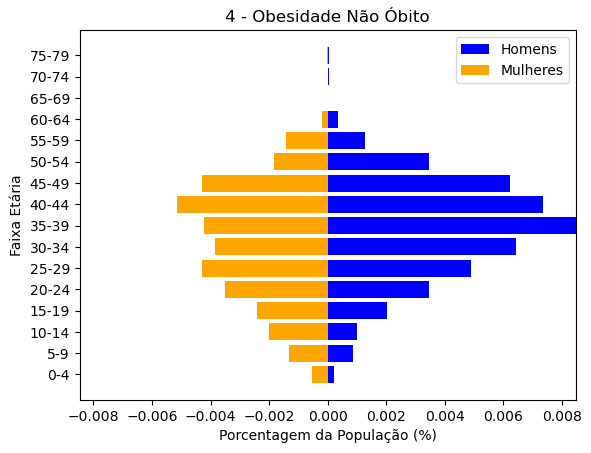

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
T-Statistic: -1.1879774082787269
P-Value: 0.254606139612649
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: -1.4383998137069494
P-Value: 0.15448062340195068
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 0.9346592855194383
P-Value: 0.3514761814496725
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: 0.2941673508051837
P-Value: 0.768834136354899
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: 0.4657605234873682
P-Value: 0.641672

In [73]:
condicao_comorbidade = (
    (df['obito']== False) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'] >= 1)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '4 - Obesidade Não Óbito')
compara_genero(df[condicao_comorbidade])

### obesidade + outras comorbidades: óbito

100% da população: 2856225 --- Pessoas com essa condição 1781 (0.000624%)


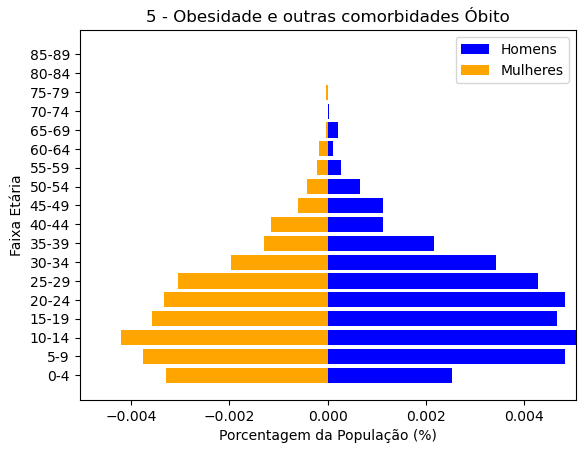

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
T-Statistic: 2.0352015758999054
P-Value: 0.088027377153614
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: 0.9825760841215245
P-Value: 0.34521234476961005
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: 0.04012638962731239
P-Value: 0.9682673441283973
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
T-Statistic: 0.15749883157896563
P-Value: 0.8755264240643

In [74]:
condicao_comorbidade = (
    (df['obito'] == True) &
    (df['obesidade'] >= 3)
)
gera_piramide_etaria(df[condicao_comorbidade], '5 - Obesidade e outras comorbidades Óbito')
compara_genero(df[condicao_comorbidade])

### obesidade + outras comorbidades: não óbito

100% da população: 2856225 --- Pessoas com essa condição 2954 (0.001034%)


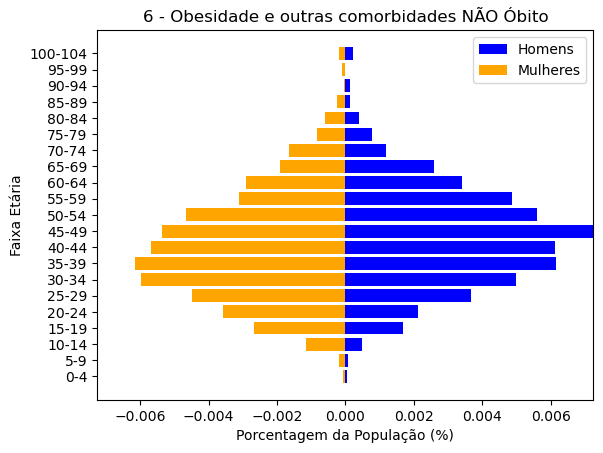

Faixa Etária: 0-4
T-Statistic: -1.3631264977132729
P-Value: 0.20596776886488252
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
T-Statistic: -1.8072866115273898
P-Value: 0.1041817291804006
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 0.42157741664902487
P-Value: 0.6767986604201709
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: -0.5250525554192248
P-Value: 0.6021824755735683
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: 1.0583179911475233
P-Value: 0.2931358108851907
REJEITA hipótese nula: pode haver diferença significativa da média 

In [75]:
condicao_comorbidade = (
    (df['obito'] == False) &
    (df['obesidade'] >= 3)
)
gera_piramide_etaria(df[condicao_comorbidade], '6 - Obesidade e outras comorbidades NÃO Óbito')
compara_genero(df[condicao_comorbidade])

# Pneumopatia

### Pneumopatia todos dados

100% da população: 2856225 --- Pessoas com essa condição 1253 (0.000439%)


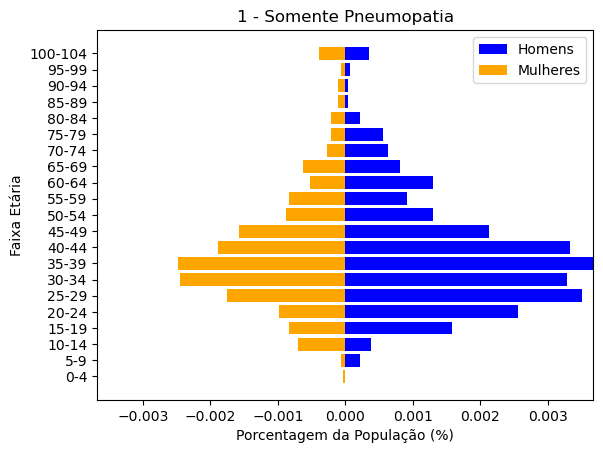

Faixa Etária: 0-4
T-Statistic: 0.612930813158112
P-Value: 0.547189434365138
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -0.3333333333333333
P-Value: 0.7705842661294382
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
T-Statistic: 0.21035158095583711
P-Value: 0.8376174472761042
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: -1.186320362623794
P-Value: 0.24939794419302252
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: 1.1766968108291043
P-Value: 0.25085577579335516
REJEITA hipótese nula: pode haver diferença significativa da média de 

In [76]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'] >= 1)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '1 - Somente Pneumopatia')
compara_genero(df[condicao_comorbidade])

### Pneumopatia e outras comorbidades

100% da população: 2856225 --- Pessoas com essa condição 133639 (0.046789%)


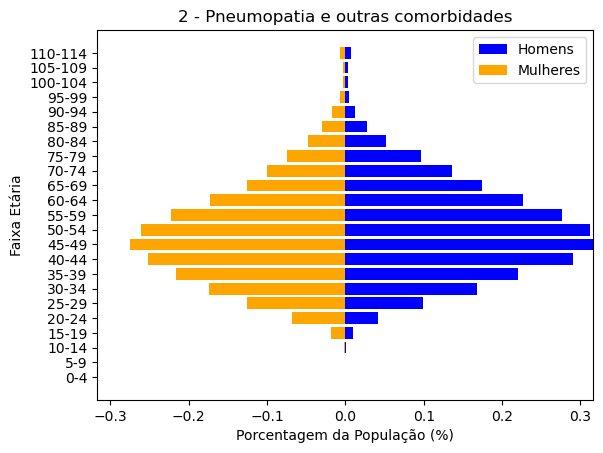

Faixa Etária: 0-4
T-Statistic: 0.16763223323971188
P-Value: 0.8669597237211482
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -0.5749406246776696
P-Value: 0.5661098699720424
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -0.2052796706112133
P-Value: 0.8375805487756118
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -1.0602987094584049
P-Value: 0.28987900027590996
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 1.3063837615303897
P-Value: 0.19176973650777815
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.1792741306152752
P-Value: 0.23845925392292394
REJEITA hipótese nula: pode haver diferença significativa

In [77]:
condicao_comorbidade = (
    (df['pneumopatia'] >= 1)
)
gera_piramide_etaria(df[condicao_comorbidade], "2 - Pneumopatia e outras comorbidades")
compara_genero(df[condicao_comorbidade])

### Pneumopatia óbito

100% da população: 2856225 --- Pessoas com essa condição 250 (0.000088%)


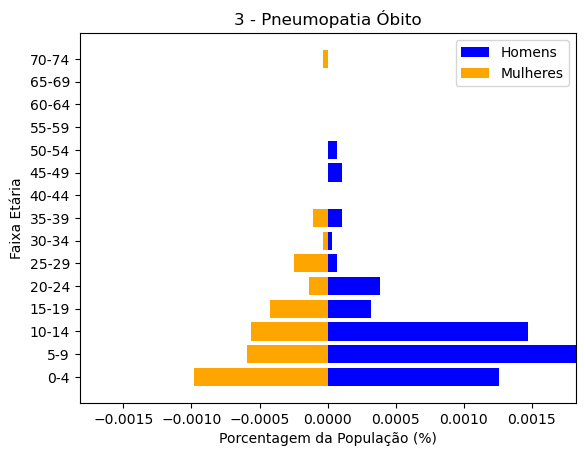

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 35-39
T-Statistic: -0.8017837257372732
P-Value: 0.4676047546093973
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 40-44
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 45-49
T-Statistic: -1.4002314623476162
P-Value: 0.2041746506706482
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Fa

In [78]:
condicao_comorbidade = (
    (df['obito']== True) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'] >=1 )) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '3 - Pneumopatia Óbito')
compara_genero(df[condicao_comorbidade])

 ### Pneumopatia não óbito

100% da população: 2856225 --- Pessoas com essa condição 110346 (0.038634%)


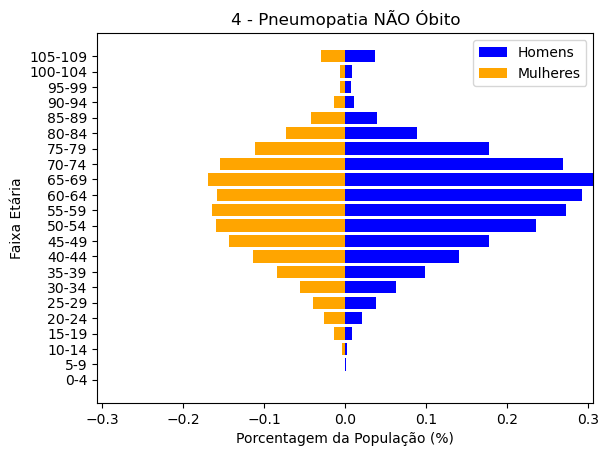

Faixa Etária: 0-4
T-Statistic: -3.915204179977774
P-Value: 9.352589970044786e-05
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: 0.8846504800469746
P-Value: 0.3768700594008271
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -0.7297009336172823
P-Value: 0.4660225672015743
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 0.6885366861605963
P-Value: 0.49134106086415064
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 0.9873927895581318
P-Value: 0.32355379640267856
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 3.6589577594037
P-Value: 0.00025606570649337583
ACEITA hipotese nula: não há diferença significativa da média 

In [79]:
condicao_comorbidade = (
    (df['obito']== False) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() >=1)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade], '4 - Pneumopatia NÃO Óbito')
compara_genero(df[condicao_comorbidade])

 ### Pneumopatia + outras comorbidades: óbito

100% da população: 2856225 --- Pessoas com essa condição 46126 (0.016149%)


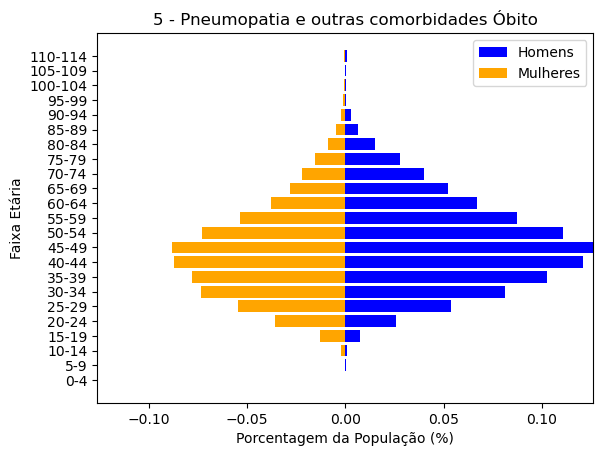

Faixa Etária: 0-4
T-Statistic: -1.4887722691082446
P-Value: 0.1436803922079049
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: 0.6642111641550714
P-Value: 0.5166360876930736
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -0.5011288111695732
P-Value: 0.6217513656327764
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 1.0474849994355988
P-Value: 0.3010119671706174
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 0.38371576122014844
P-Value: 0.7017671119515503
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 0.7313725794651603
P-Value: 0.4650851609900486
REJEITA hipótese nula: pode haver diferença significativa da 

In [80]:
condicao_comorbidade = (
    (df['obito']== True) &
    ((df['pneumopatia'].isna() >=1))
)
gera_piramide_etaria(df[condicao_comorbidade], '5 - Pneumopatia e outras comorbidades Óbito')
compara_genero(df[condicao_comorbidade])

 ### Pneumopatia + outras comorbidades: não óbito

100% da população: 2856225 --- Pessoas com essa condição 2664766 (0.932968%)


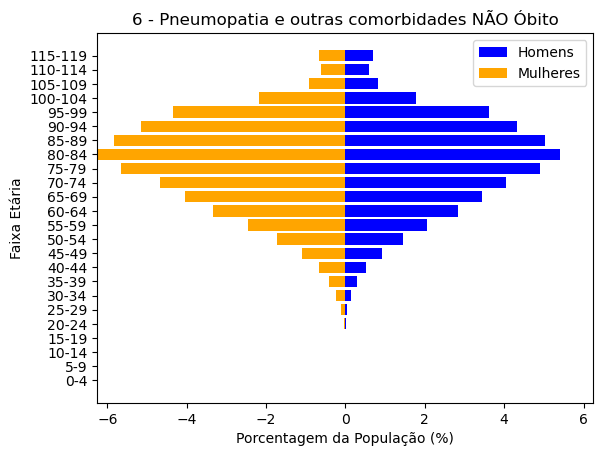

Faixa Etária: 0-4
T-Statistic: -1.0866755522961984
P-Value: 0.27718707213323046
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -1.9685544642072486
P-Value: 0.04901222714070486
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -5.722648249407718
P-Value: 1.0547476752138613e-08
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 3.363945238986395
P-Value: 0.0007686228868506159
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: -4.689673413838477
P-Value: 2.7379986502161686e-06
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 2.4581104977275703
P-Value: 0.013967641530105483
ACEITA hipotese nula: não há diferença significativa da média de ida

In [81]:
condicao_comorbidade = (
    (df['obito']== False) &
    ((df['pneumopatia'].isna() >=1))
)
gera_piramide_etaria(df[condicao_comorbidade], '6 - Pneumopatia e outras comorbidades NÃO Óbito')
compara_genero(df[condicao_comorbidade])

# Sindrome de down

### Sindrome de down todos dados

100% da população: 2856225 --- Pessoas com essa condição 88 (0.000031%)


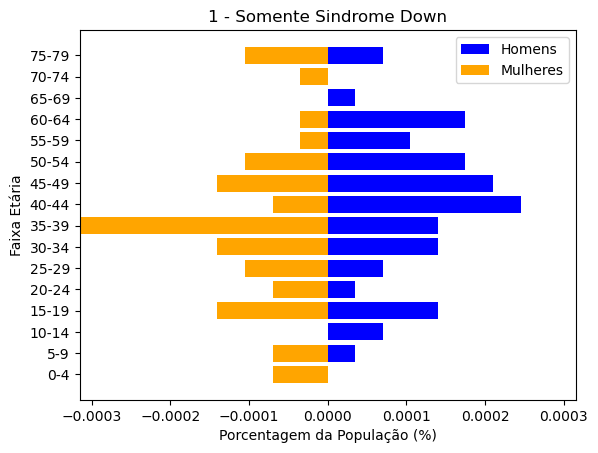

Faixa Etária: 0-4
T-Statistic: 1.341640786499874
P-Value: 0.272228401224416
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
T-Statistic: -0.5477225575051671
P-Value: 0.6036450565101357
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: -0.3279680246763174
P-Value: 0.7513546252249386
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
T-Statistic: -0.604990141982018
P-Value: 0.5642746753246715
REJEITA hipótese nula: pode haver diferença significativa da média de idade entr

In [82]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'] >= 1))
)
gera_piramide_etaria(df[condicao_comorbidade], '1 - Somente Sindrome Down')
compara_genero(df[condicao_comorbidade])

### Sindrome de down e outras comorbidades

100% da população: 2856225 --- Pessoas com essa condição 130085 (0.045544%)


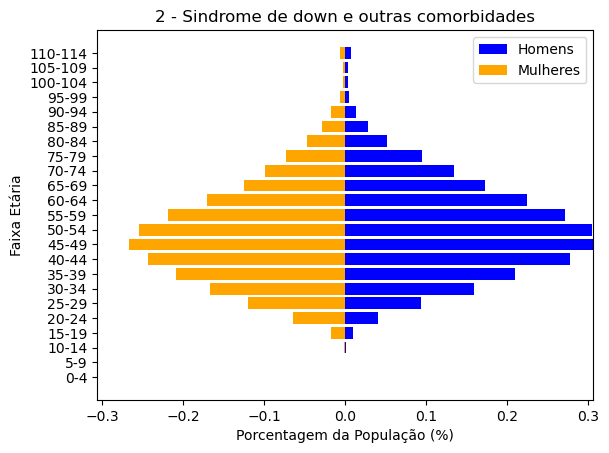

Faixa Etária: 0-4
T-Statistic: 0.09795806168338031
P-Value: 0.9220186388162563
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -0.74580887994736
P-Value: 0.45688404717671216
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: 0.3601990135923524
P-Value: 0.7191206111268507
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -0.8190663715721569
P-Value: 0.4134097366279994
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 1.1041725538407865
P-Value: 0.26982821541001
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.4317704395901094
P-Value: 0.15240171586243212
REJEITA hipótese nula: pode haver diferença significativa da mé

In [83]:
condicao_comorbidade = (
    (df['sindrome_de_down'] >= 1)
)
gera_piramide_etaria(df[condicao_comorbidade], "2 - Sindrome de down e outras comorbidades")
compara_genero(df[condicao_comorbidade])

### Sindrome de down óbito

100% da população: 2856225 --- Pessoas com essa condição 21 (0.000007%)


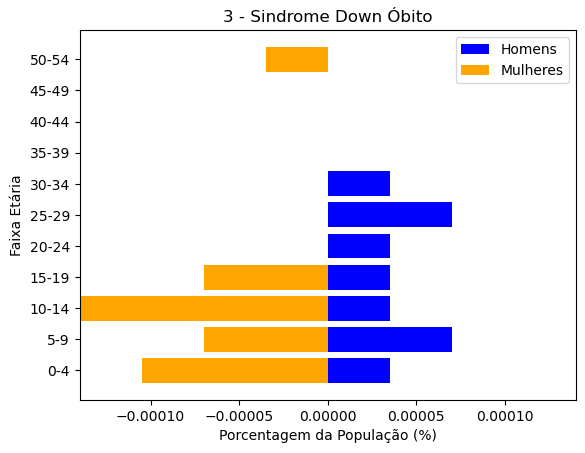

Faixa Etária: 0-4
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 30-34
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 35-39
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 40-44
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 45-49
T-Statistic: 1.0
P-Value: 0.42264973081037427
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 50-54
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 55-59
Não há

In [84]:
condicao_comorbidade = (
    (df['obito']== True) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'] >= 1))
)
gera_piramide_etaria(df[condicao_comorbidade], '3 - Sindrome Down Óbito')
compara_genero(df[condicao_comorbidade])

### Sindrome de down não óbito

100% da população: 2856225 --- Pessoas com essa condição 55 (0.000019%)


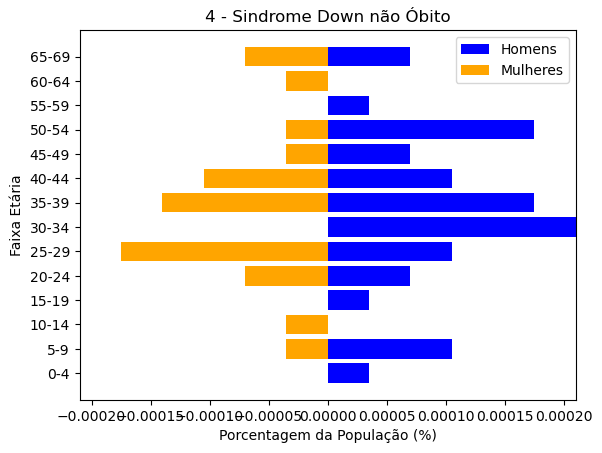

Faixa Etária: 0-4
T-Statistic: 1.0
P-Value: 0.42264973081037427
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 10-14
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 15-19
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 20-24
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 25-29
T-Statistic: -0.7276068751089989
P-Value: 0.5071575069992283
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 30-34
T-Statistic: -0.452413928358864
P-Value: 0.6646582183645231
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 35-39
Não há dados suficientes para realizar o teste t de Student.

Faixa Etária: 40-44
T-Statistic: -0.6694555487164978
P-Value: 0.5281108008083693
REJEITA hi

In [85]:
condicao_comorbidade = (
    (df['obito']== False) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'] >= 1))
)
gera_piramide_etaria(df[condicao_comorbidade], '4 - Sindrome Down não Óbito')
compara_genero(df[condicao_comorbidade])

### Sindrome de down + outras comorbidades: óbito

100% da população: 2856225 --- Pessoas com essa condição 83965 (0.029397%)


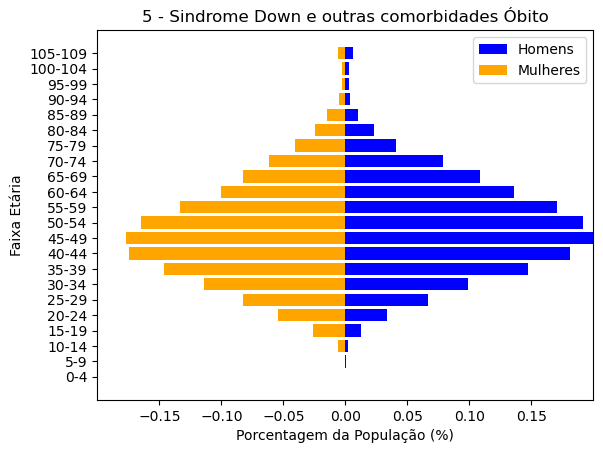

Faixa Etária: 0-4
T-Statistic: -0.41358727393181133
P-Value: 0.6794356162501235
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: -0.8405171149432533
P-Value: 0.40195630628847023
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: -0.2530787786034269
P-Value: 0.8005282008511849
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: 0.03722836885967862
P-Value: 0.9703326287600182
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 0.5676733433154172
P-Value: 0.570433513721829
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 1.3149991420992324
P-Value: 0.18873138293702857
REJEITA hipótese nula: pode haver diferença significativa 

In [86]:
condicao_comorbidade = (
    (df['obito']== False) &
    ((df['sindrome_de_down'] >= 1))
)
gera_piramide_etaria(df[condicao_comorbidade], '5 - Sindrome Down e outras comorbidades Óbito')
compara_genero(df[condicao_comorbidade])

### Sindrome de down + outras comorbidades:não óbito

100% da população: 2856225 --- Pessoas com essa condição 46120 (0.016147%)


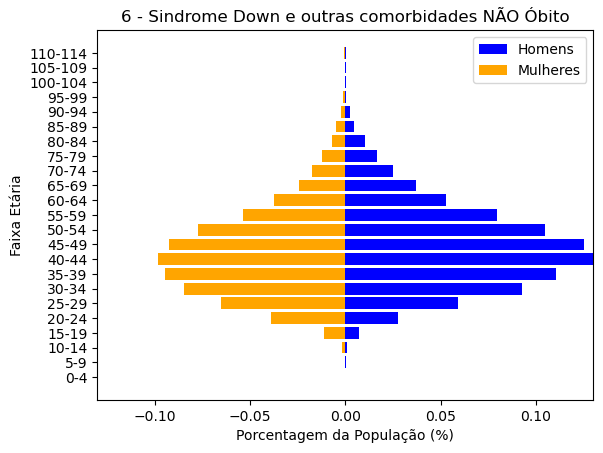

Faixa Etária: 0-4
T-Statistic: 1.5572478344543164
P-Value: 0.13150182133633168
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 5-9
T-Statistic: 0.2976702788937934
P-Value: 0.7745952022538601
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 10-14
T-Statistic: 2.703890135571105
P-Value: 0.01564682293775986
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 15-19
T-Statistic: -2.4493057608372046
P-Value: 0.018463059822008136
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.

Faixa Etária: 20-24
T-Statistic: 1.5086262927340501
P-Value: 0.13374850993124912
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.

Faixa Etária: 25-29
T-Statistic: 0.5618715637012986
P-Value: 0.5746857059879031
REJEITA hipótese nula: pode haver diferença significativa da média de

In [87]:
condicao_comorbidade = (
    (df['obito']== True) &
    ((df['sindrome_de_down'] >= 1))
)
gera_piramide_etaria(df[condicao_comorbidade], '6 - Sindrome Down e outras comorbidades NÃO Óbito')
compara_genero(df[condicao_comorbidade])